</h1></center><center><h1 style="font-size:350%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:40px;"> Tube Twin: Passenger Count Forecasting/ General Tube Analysis 
</h1></center>

</h1></center><center><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:15px;"> Company Name
</h1></center>

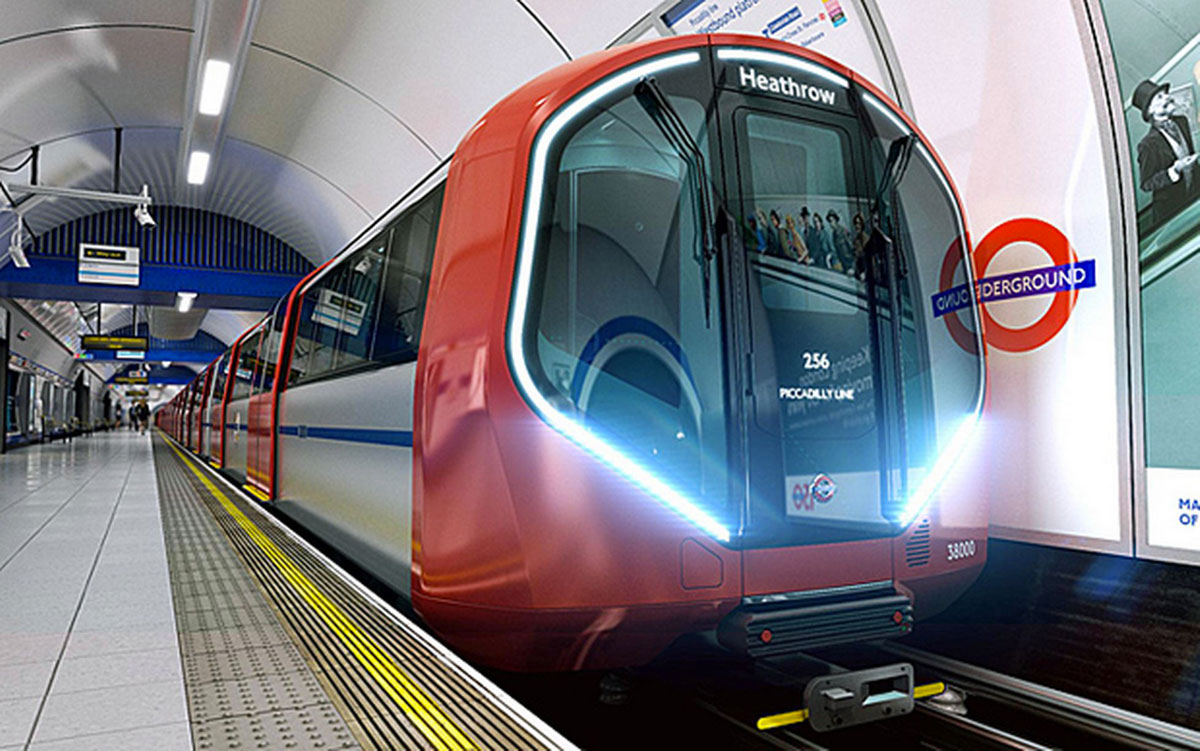

</h1></center><center><h1 style="font-size:250%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> Created By: Team 6
</h1></center>

</h1></left><left><h1 style="font-size:300%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> TABLE OF CONTENTS
</h1></left>

<a id="cont"></a>


<a href=#one>1. Team Members</a>

<a href=#two>2. Project Overview</a>

<a href=#three>3. Problem Statement</a>

<a href=#four>4. Package Imports and Global Constants</a>

<a href=#five>5. Data Collection</a>

<a href=#six>6. Exploratory Data Analysis (EDA)</a>

<a href=#seven>7.  Model Development</a>

<a href=#eight>8. Refferences</a> 

<a id="one"></a>
</h1></left><left><h1 style="font-size:250%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;">Team Members
</h1></left>
<a href=#cont>Back to Table of Contents</a>


---               
 ### 1. Emmanuel David Fielami
 ### 2. Hakim Balogun 
 ### 3. Micheal Mamah 
 ### 4. Harmony Odumuko
 ### 5. Endurance Arienkhe
 ### 6. Kelvin Mwaniki
---


<a id="two"></a>
</h1></left><left><h1 style="font-size:250%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> PROJECT OVERVIEW
</h1></left>
<a href=#cont>Back to Table of Contents</a>

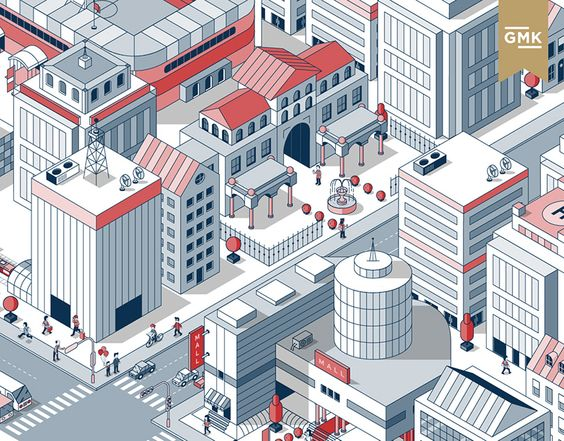

<a id="three"></a>
</h1></left><left><h1 style="font-size:250%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> PROBLEM STATEMENT
</h1></left>
<a href=#cont>Back to Table of Contents</a>

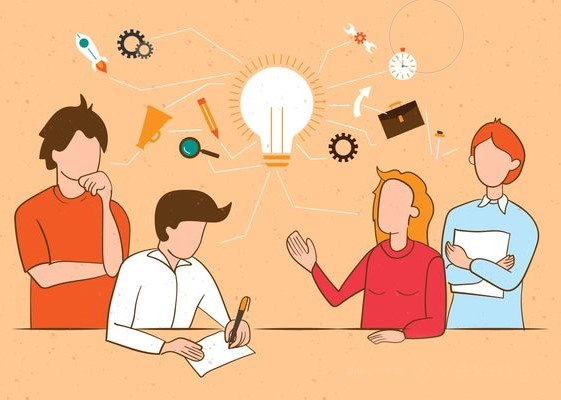

<a id="four"></a>
</h1></left><left><h1 style="font-size:125%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> INITIALIZING COMET EXPERIMENT
</h1></left>
<a href=#cont>Back to Table of Contents</a>

In [ ]:
'''
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="Lpfu75uOcVbBnxgwrSlgcau93",
    project_name="general",
    workspace="kev-m",
)
#Import warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
'''

<a id="four"></a>
</h1></left><left><h1 style="font-size:250%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> PACKAGE AND GLOBAL CONSTANTS IMPORTS
</h1></left>
<a href=#cont>Back to Table of Contents</a>

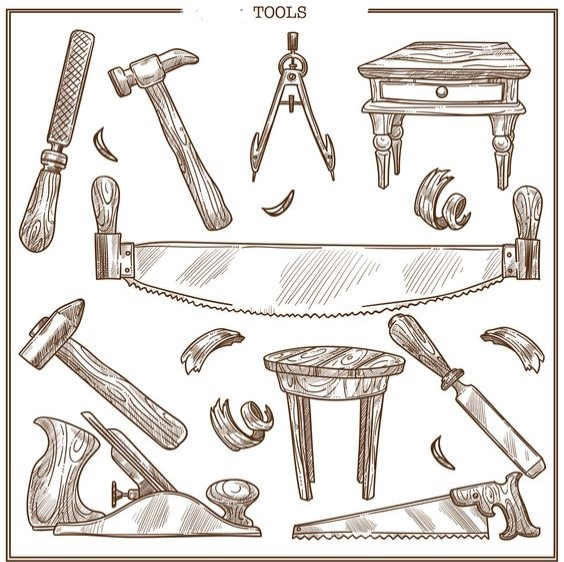

In [1]:
# General modules 
import warnings

In [2]:
# TFL API manipulation modules
import json
import requests
from tfl.client import Client
from tfl.api_token import ApiToken
from requests.auth import HTTPBasicAuth

In [3]:
# Data manipulation modules
import csv
import glob
import logging
import numpy as np
import pandas as pd
import tabula as tb
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as pl
from IPython.display import Image

In [4]:
# Model building modules
import time
import pickle
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression, LogisticRegression, BayesianRidge, ElasticNet 


In [5]:
# Filtering Jupyter Notebook Warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [6]:
# Global constants for use in subsections of the notebook
le = preprocessing.LabelEncoder()
columns1 = ['nlc', 'Station', 'Borough', 'Weekday Entry', 'Saturday Entry', 'Sunday Entry', 'Weekday Exit', 'Saturday Exit', 'Sunday Exit', 'Annual Entry + Exit (millions)']
columns2 = ['nlc', 'Station', 'Weekday Entry', 'Saturday Entry', 'Sunday Entry', 'Weekday Exit', 'Saturday Exit', 'Sunday Exit', 'Annual Entry + Exit (millions)']
columns3A = ['nlc', 'Station Name', 'Time Period', 'Total', 'Male', 'Female', 'Sex: Not Stated', 'Age: Not Stated', 'Under 16', '16-19',
           '20-24', '25-34', '35-44', '45-59', '60-64', '65-70', 'Over 70', 'MIP Not Given', 'Mobility Impariment', 'Hearing Impairment',
           'Mental Health Condition', 'None', 'Visual Impairment', 'Learning Dissability', 'Serious Long Term Illness', 'Other']
columns3B = ['nlc', 'Station Name', 'Time Period', 'Total', 'Male', 'Female', 'Sex: Not Stated', 'Age: Not Stated', 'Under 16',
            '16-19', '20-24','25-34','35-44','45-59','60-64','65-70','Over 70']
columns4 = ['nlc', 'Station Name', 'Time Period', 'All Modes', 'Home to Work', 'Work to Home', 'Origin Purpose: Home', 'Work',
           'Shop', 'Education', 'Tourist', 'Hotel', 'Other', 'Unknown/Not Given', 'Destination Purpose: Home', 'Work', 'Shop',
           'Education', 'Tourist', 'Hotel', 'Other', 'Unkown/Not Given'] 
File_list = ['EntryExit_2017_2007', 'EntryExit_2016', 'EntryExit_2015', 'EntryExit_2014', 'EntryExit_2013', 'EntryExit_2012', 'EntryExit_2011', 'EntryExit_2010', 'EntryExit_2009', 'EntryExit_2008', 'EntryExit_2007']


<a id="five"></a>
</h1></left><left><h1 style="font-size:250%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> DATA COLLECTION
</h1></left>
<a href=#cont>Back to Table of Contents</a>

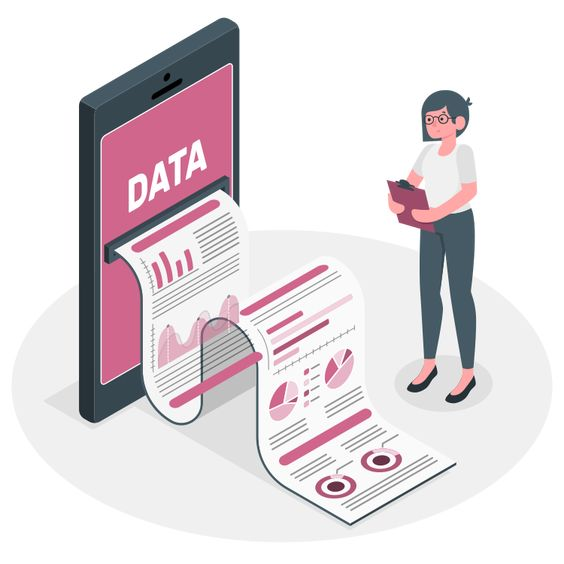

</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> I LOADING CSV FILES
</h1></left>
<a href=#cont>Back to Table of Contents</a>

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Loading Historical Datasets
</h1></left>

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> i> Annualized Entry-Exit Counts [2017-2021]
</h1></left>

In [7]:
# Annualized Entry-Exit Counts [2017 - 2021]
merged_2017_2021 =  pd.read_excel('Annualized_Entry-Exit_Counts[2017-2021]/ByQhrEntryExit_2017.xlsx', sheet_name='ByQhr', header=6) 
EntryExit_2021 = pd.read_excel('Annualized_Entry-Exit_Counts[2017-2021]/AC2021_ByQhrEntryExit.xlsx', sheet_name='ByQhr', header=6)
EntryExit_2020 = pd.read_excel('Annualized_Entry-Exit_Counts[2017-2021]/AC2020_ByQhrEntryExit.xlsx', sheet_name='ByQhr', header=6)
EntryExit_2019 = pd.read_excel('Annualized_Entry-Exit_Counts[2017-2021]/ByQhrEntryExit_2019.xlsx', sheet_name='ByQhr', header=6)
EntryExit_2018 = pd.read_excel('Annualized_Entry-Exit_Counts[2017-2021]/ByQhrEntryExit_2018.xlsx', sheet_name='ByQhr', header=6)
EntryExit_2017 = pd.read_excel('Annualized_Entry-Exit_Counts[2017-2021]/ByQhrEntryExit_2017.xlsx', sheet_name='ByQhr', header=6) 

# Annualized Entry-Exit Counts [2007 - 2017]
merged_2017_2007 = pd.read_excel('Time_Series_Modeling_Datasets/multi-year-station-entry-and-exit-figures.xls', names = columns2, sheet_name = 'merged_2017_2007', header = 3)
EntryExit_2017_2007 = pd.read_excel('Time_Series_Modeling_Datasets/multi-year-station-entry-and-exit-figures.xls', names = columns1, sheet_name = '2017 Entry & Exit', header = 6)
EntryExit_2016 = pd.read_excel('Time_Series_Modeling_Datasets/multi-year-station-entry-and-exit-figures.xls', names = columns1, sheet_name = '2016 Entry & Exit', header = 6)
EntryExit_2015 = pd.read_excel('Time_Series_Modeling_Datasets/multi-year-station-entry-and-exit-figures.xls', names = columns1, sheet_name = '2015 Entry & Exit', header = 6)
EntryExit_2014 = pd.read_excel('Time_Series_Modeling_Datasets/multi-year-station-entry-and-exit-figures.xls', names = columns1, sheet_name = '2014 Entry & Exit', header = 6)
EntryExit_2013 = pd.read_excel('Time_Series_Modeling_Datasets/multi-year-station-entry-and-exit-figures.xls', names = columns2, sheet_name = '2013 Entry & Exit', header = 6)
EntryExit_2012 = pd.read_excel('Time_Series_Modeling_Datasets/multi-year-station-entry-and-exit-figures.xls', names = columns2, sheet_name = '2012 Entry & Exit', header = 6)
EntryExit_2011 = pd.read_excel('Time_Series_Modeling_Datasets/multi-year-station-entry-and-exit-figures.xls', names = columns2, sheet_name = '2011 Entry & Exit', header = 6)
EntryExit_2010 = pd.read_excel('Time_Series_Modeling_Datasets/multi-year-station-entry-and-exit-figures.xls', names = columns2, sheet_name = '2010 Entry & Exit', header = 6)
EntryExit_2009 = pd.read_excel('Time_Series_Modeling_Datasets/multi-year-station-entry-and-exit-figures.xls', names = columns2, sheet_name = '2009 Entry & Exit', header = 6)
EntryExit_2008 = pd.read_excel('Time_Series_Modeling_Datasets/multi-year-station-entry-and-exit-figures.xls', names = columns2, sheet_name = '2008 Entry & Exit', header = 6)
EntryExit_2007 = pd.read_excel('Time_Series_Modeling_Datasets/multi-year-station-entry-and-exit-figures.xls', names = columns2, sheet_name = '2007 Entry & Exit', header = 6)

# Annualized Entry-Exit Counts [2018 - 2021]
EntryExit_Monthly = pd.read_csv('Time_Series_Modeling_Datasets/Entry and Exit data.csv')

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> ii> Crowding Data
</h1></left>

In [8]:
# Crowding Data 
CRD_tld = pd.read_csv('Crowding_Data/LUTrainLoadingData.csv')
CRD_snd = pd.read_csv('Crowding_Data/StationNodesDescription.csv')
CRD_splf = pd.read_csv('Crowding_Data/StationPassengerLinkFlows.csv')

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> iii> NUMBAT Data
</h1></left>

In [9]:
# NUMBAT Definitions
NBT_defs_Nodes = pd.read_excel('NUMBAT_Data/NBT19_Definitions.xlsx', sheet_name = 'Nodes', header =0)
NBT_defs_Links = pd.read_excel('NUMBAT_Data/NBT19_Definitions.xlsx', sheet_name = 'Links', header = 0)
NBT_defs_Modes = pd.read_excel('NUMBAT_Data/NBT19_Definitions.xlsx', sheet_name = 'Modes', header = 0)
NBT_defs_Lines = pd.read_excel('NUMBAT_Data/NBT19_Definitions.xlsx', sheet_name = 'Lines', header = 0)
NBT_defs_Stations = pd.read_excel('NUMBAT_Data/NBT19_Definitions.xlsx', sheet_name = 'Stations', header = 0)
NBT_defs_StationComplexes = pd.read_excel('NUMBAT_Data/NBT19_Definitions.xlsx', sheet_name = 'StationComplexes', header = 0)
NBT_defs_DayTypes = pd.read_excel('NUMBAT_Data/NBT19_Definitions.xlsx', sheet_name = 'DayTypes', header = 0)
NBT_defs_Qhr = pd.read_excel('NUMBAT_Data/NBT19_Definitions.xlsx', sheet_name = 'Qhr', header = 0)
NBT_defs_Timebands = pd.read_excel('NUMBAT_Data/NBT19_Definitions.xlsx', sheet_name = 'Timebands', header = 0)
NBT_defs_Directions = pd.read_excel('NUMBAT_Data/NBT19_Definitions.xlsx', sheet_name = 'Directions', header = 0)
NBT_defs_Movements = pd.read_excel('NUMBAT_Data/NBT19_Definitions.xlsx', sheet_name = 'Movements', header = 0)

In [10]:
# 2017 NUMBAT RODS Data 
# Entry Data
NBT_entry_agm = pd.read_excel('NUMBAT_Data/RODS/2017/Entry/Age, gender, mobility category by entry station-zone-time of day 2017.xlsx', names = columns3A, sheet_name = 'agesex', header= 4) 
NBT_entry_ajt = pd.read_excel('NUMBAT_Data/RODS/2017/Entry/Average journey time by entry station-zone-time of day 2017.xlsx', sheet_name = 'station', header= 4) 
NBT_entry_dt = pd.read_excel('NUMBAT_Data/RODS/2017/Entry/Distance travelled by entry station-zone-line-purpose-time of day-ticket type 2017.xlsx', sheet_name = 'By station', header= 4) 
NBT_entry_jf = pd.read_excel('NUMBAT_Data/RODS/2017/Entry/Journey frequency by entry station-zone-purpose-time of day-ticket type 2017.xlsx', sheet_name = 'by station', header= 4) 
NBT_entry_jp = pd.read_excel('NUMBAT_Data/RODS/2017/Entry/Journey purpose by entry station-zone-time of day-ticiket type 2017.xlsx', names = columns4, sheet_name = 'journey purpose', header= 5) 
NBT_entry_tt = pd.read_excel('NUMBAT_Data/RODS/2017/Entry/Ticket type by entry station-zone-time of day 2017.xlsx', sheet_name = 'ticket_type', header= 4) 


In [11]:
# Exit Data
NBT_exit_agm = pd.read_excel('NUMBAT_Data/RODS/2017/Exit/Age, gender, mobility category by exit station-zone-time of day 2017.xlsx', names = columns3B, sheet_name = 'age&sex', header= 4) 
NBT_exit_ajt = pd.read_excel('NUMBAT_Data/RODS/2017/Exit/Average journey time by exit station-zone-time of day 2017.xlsx', sheet_name = 'station', header= 4) 
NBT_exit_dt = pd.read_excel('NUMBAT_Data/RODS/2017/Exit/Distance travelled by exit station-zone-line-purpose-time of day-ticket type 2017.xlsx', sheet_name = 'by ticket type', header= 4) 
NBT_exit_egress = pd.read_excel('NUMBAT_Data/RODS/2017/Exit/Egress mode by exit station-zone-time of day 2017.xlsx', sheet_name = 'Egress', header= 4) 
NBT_exit_jf = pd.read_excel('NUMBAT_Data/RODS/2017/Exit/Journey frequency by exit station-zone-purpose-time of day-ticket type 2017.xlsx', sheet_name = 'by station', header= 4) 
NBT_exit_jp = pd.read_excel('NUMBAT_Data/RODS/2017/Exit/Journey purpose by exit station-zone-time of day-ticket type 2017.xlsx', names = columns4,  sheet_name = 'journey purpose', header= 5) 
NBT_exit_tt = pd.read_excel('NUMBAT_Data/RODS/2017/Exit/Ticket type by exit station-zone-time of day 2017.xlsx', sheet_name = 'ticket_type', header= 4) 


In [12]:
# Misc Data
NBT_msc_baa_boarders = pd.read_excel('NUMBAT_Data/RODS/2017/Misc/Boarders and alighters by station-line-time of day 2017.xlsx', sheet_name = 'Boarders', header= 2) 
NBT_msc_baa_alighters = pd.read_excel('NUMBAT_Data/RODS/2017/Misc/Boarders and alighters by station-line-time of day 2017.xlsx', sheet_name = 'Alighters', header= 2) 
NBT_msc_baa_line = pd.read_excel('NUMBAT_Data/RODS/2017/Misc/Boarders and alighters by station-line-time of day 2017.xlsx', sheet_name = 'Line', header= 3) 
NBT_msc_jii = pd.read_excel('NUMBAT_Data/RODS/2017/Misc/Journeys involving interchange by zone-no of interchanges 2017.xlsx', sheet_name = 'Interchanges', header= 3) 
NBT_msc_ll = pd.read_excel('NUMBAT_Data/RODS/2017/Misc/Line loading by section-line-time of day 2017.xlsx', sheet_name = 'Line_loads', header= 2) 
NBT_msc_odm = pd.read_excel('NUMBAT_Data/RODS/2017/Misc/Origin-destination matrix by station-zone-time of day 2017.xlsx', sheet_name = 'matrix', header=2 ) 
NBT_msc_rc = pd.read_excel('NUMBAT_Data/RODS/2017/Misc/Route choice by origin-destination pair 2017.xlsx', sheet_name = 'route choice', header= 2) 
NBT_msc_sf = pd.read_excel('NUMBAT_Data/RODS/2017/Misc/Station flows by station-time of day 2017.xlsx', sheet_name = 'link_flows', header= 2) 
NBT_msc_tee_entries = pd.read_excel('NUMBAT_Data/RODS/2017/Misc/Total entries and exits by borough-time of day 2017.xlsx', sheet_name = 'entries', header= 4) 
NBT_msc_tee_exits = pd.read_excel('NUMBAT_Data/RODS/2017/Misc/Total entries and exits by borough-time of day 2017.xlsx', sheet_name = 'exits', header= 4)

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Merging Excel files into a single CSV file
</h1></left>

In [ ]:
# Specifyies the path to the Excel files
#path = "../Time_Series_Modeling_Datasets/"
 
# Points to all of the required Excel files in the path 
#file_list = glob.glob(path + "*.xls") 
 
# Empty list for the files we want to merge.
#excl_list = []

# pd.read_excel(file_path) reads the excel data into pandas dataframe.  
#for file in file_list:
#    excl_list.append(pd.read_excel(file, sheet_name='ByQhr', header=6)) 
    
# Creates merged excel file from the excel files list
excl_merged = pd.concat(File_list, ignore_index=True) 
 
# Converts the merged excel file to into a new CSV file with specified name.
excl_merged.to_csv('../Time_Series_Modeling_Datasets/EntryExit_2017_2007.csv', index=False) 

# Reading the historial_tube_data CSV file 
merged_2017_2007 = pd.read_csv('../Time_Series_Modeling_Datasets/EntryExit_2017_2007.csv') 

# Setting column display to show all columns and limiting decimals to 2. 
pd.set_option("display.max.columns", None, "display.precision", 2)  

In [ ]:
# Checking the merged file
merged_2017_2021.head(2)

</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> II LOADING TFL APIs
</h1></left>
<a href=#cont>Back to Table of Contents</a>

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Loading API URLs
</h1></left>

In [13]:
'''
This code links the various TFL APIs to a variable for
easy record retrieval
'''
AccidentStats = '?https://api.tfl.gov.uk/AccidentStats/{year}'
AirQuality = 'https://api.tfl.gov.uk/AirQuality/'
BikePoint = 'https://api.tfl.gov.uk/BikePoint/'
Journey = 'https://api.tfl.gov.uk/Journey'
Line =  'https://api.tfl.gov.uk/Line/Route?serviceTypes=Regular'
Mode = 'https://api.tfl.gov.uk/Mode/{mode}/Arrivals[?count]'
Occupancy = 'https://api.tfl.gov.uk/Occupancy'
Road = 'https://api.tfl.gov.uk/Road/{ids}/Disruption[?stripContent][&severities][&categories][&closures]'
Search = 'https://api.tfl.gov.uk/Search/Meta/Categories'
Station = 'https://api.tfl.gov.uk/stationdata/tfl-stationdata-detailed.zip'
StopPoint = 'https://api.tfl.gov.uk/StopPoint'


</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Fetching Data from APIs
</h1></left>

In [14]:
'''
This function retrieves daily records from the various TFL APIs
depending on the API variable name used.
'''
def get_api_records(API_Name):
    # extracting Line Data directly from API
    url = API_Name
    
    # Access credentials
    app_id = 'EXPLORE_TUBE_TWIN_PROJECT'
    app_key = 'f8f6ab8258464b1ca5ddd33c0ff2ee12'
    api_token = {"app_id": app_id, "app_key": app_key}
    
    # Stating file format to use
    headers = {"Accept": "application/json"}
    
    # Initializing get request
    r = requests.get(url, api_token, headers=headers)
    
    # Assigning file to Json() format 
    File_Name = r.json()
    
    # Displaying fetched records
    return File_Name
    

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Converting Json files to CSV files
</h1></left>

<a id="six"></a>
</h1></left><left><h1 style="font-size:250%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> EXPLORATORY DATA ANALYSIS
</h1></left>
<a href=#cont>Back to Table of Contents</a>

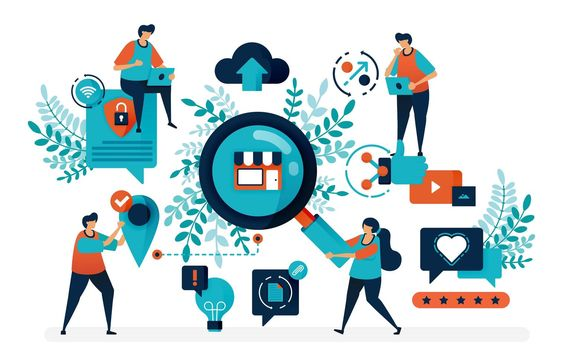

</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> DATA CLEANING
</h1></left>
<a href=#cont>Back to Table of Contents</a>

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> i> Entry Datasets
</h1></left>

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Title:  Age Gender Mobility Category by Entry Station-Zone-Time Dataset
</h1></left>

In [17]:
# This code checks the overall layout of the first five rows of the data.
NBT_entry_agm.head()

,nlc,Station Name,Time Period,Total,Male,Female,Sex: Not Stated,Age: Not Stated,Under 16,16-19,...,Over 70,MIP Not Given,Mobility Impariment,Hearing Impairment,Mental Health Condition,None,Visual Impairment,Learning Dissability,Serious Long Term Illness,Other
0,500,Acton Town,Early,608,0,0,608,608,0,0,...,0,608,0,0,0,0,0,0,0,0
1,500,Acton Town,AM peak,3287,996,1811,481,467,75,0,...,39,672,0,10,47,2491,55,6,7,0
2,500,Acton Town,Midday,2692,1104,1491,97,110,0,176,...,329,1303,55,1,15,1259,3,0,56,0
3,500,Acton Town,PM Peak,2030,896,1090,44,38,0,3,...,178,405,27,0,48,1548,0,2,0,0
4,500,Acton Town,Evening,656,356,243,57,41,0,19,...,0,500,0,0,0,145,0,11,0,0


In [18]:
# Gets the summary information of the dataset features, row entries and null value counts
NBT_entry_agm.info(), print('The number of null entries is:', NBT_entry_agm.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869 entries, 0 to 1868
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   nlc                        1869 non-null   int64 
 1   Station Name               1869 non-null   object
 2   Time Period                1869 non-null   object
 3   Total                      1869 non-null   int64 
 4   Male                       1869 non-null   int64 
 5   Female                     1869 non-null   int64 
 6   Sex: Not Stated            1869 non-null   int64 
 7   Age: Not Stated            1869 non-null   int64 
 8   Under 16                   1869 non-null   int64 
 9   16-19                      1869 non-null   int64 
 10  20-24                      1869 non-null   int64 
 11  25-34                      1869 non-null   int64 
 12  35-44                      1869 non-null   int64 
 13  45-59                      1869 non-null   int64 
 14  60-64   

(None, None)

##### Observations

It can be observed that the dataframe contains 26 columns of which two are object datatype and the rest int64 datatype with 1869 non-null entries and zero Null values detected originally.

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Title:  Average Journey Time by Entry Station-Zone-Time Dataset
</h1></left>

In [19]:
# This code checks the overall layout of the first five rows of the data.
NBT_entry_ajt.head()

,NLC,Station Name,Time period,Total,Total time,Average,< 15 mins,15 - 30,30 - 45,45 - 60,60 - 90,over 90
0,500,Acton Town,Early,608,19068,31.37,171,73,166,197,0,0
1,500,Acton Town,AM peak,3287,83907,25.53,762,1252,1038,229,6,0
2,500,Acton Town,Midday,2692,69467,25.81,671,947,945,102,27,0
3,500,Acton Town,PM Peak,2030,61494,30.30,254,770,790,110,106,0
4,500,Acton Town,Evening,656,15906,24.25,202,284,78,87,6,0


In [177]:
# Gets the summary information of the dataset features, row entries and null value counts
NBT_entry_ajt.info(), print('The number of null entries is:', NBT_entry_ajt.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869 entries, 0 to 1868
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NLC           1869 non-null   int64  
 1   Station Name  1869 non-null   object 
 2   Time period   1869 non-null   object 
 3   Total         1869 non-null   int64  
 4   Total time    1869 non-null   int64  
 5   Average       1869 non-null   float64
 6   < 15 mins     1869 non-null   int64  
 7   15 - 30       1869 non-null   int64  
 8   30 - 45       1869 non-null   int64  
 9   45 - 60       1869 non-null   int64  
 10  60 - 90       1869 non-null   int64  
 11  over 90       1869 non-null   int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 175.3+ KB
The number of null entries is: 0


(None, None)

##### Observations

It can be observed that the dataframe contains 12 columns of which two are object datatype, one float64 datatype and the rest int64 datatype with 1869 non-null entries and zero Null values detected originally.

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> Title: Distance Travelled by Entry Station-Zone-Line-Purpose-Time Dataset
</h1></left>

In [21]:
# This code checks the overall layout of the first five rows of the data.
NBT_entry_dt.head()

,Station,Total,< 1 km,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,30+ kms
0,Acton Town,9518.0,0.0,113.0,988.0,146.0,896.0,281.0,364.0,453.0,...,34.0,82.0,58.0,40.0,62.0,0.0,0.0,0.0,3.0,90.0
1,Aldgate,15005.0,1089.0,1343.0,2097.0,191.0,3127.0,453.0,652.0,342.0,...,595.0,221.0,127.0,361.0,98.0,165.0,117.0,197.0,38.0,408.0
2,Aldgate East,22302.0,1410.0,1859.0,1660.0,781.0,3800.0,2140.0,1025.0,862.0,...,29.0,8.0,251.0,11.0,0.0,16.0,0.0,0.0,0.0,59.0
3,Alperton,4496.0,0.0,138.0,0.0,378.0,507.0,133.0,141.0,102.0,...,15.0,18.0,0.0,0.0,2.0,18.0,32.0,0.0,0.0,10.0
4,Amersham,2552.0,9.0,0.0,0.0,25.0,0.0,6.0,16.0,0.0,...,1.0,52.0,3.0,24.0,2.0,12.0,13.0,1.0,0.0,2265.0


In [22]:
# Gets the summary information of the dataset features, row entries and null value counts
NBT_entry_dt.info(), print('The number of null entries is:', NBT_entry_dt.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Station  272 non-null    object 
 1   Total    269 non-null    float64
 2   < 1 km   270 non-null    float64
 3   2        270 non-null    float64
 4   3        270 non-null    float64
 5   4        270 non-null    float64
 6   5        270 non-null    float64
 7   6        270 non-null    float64
 8   7        270 non-null    float64
 9   8        270 non-null    float64
 10  9        270 non-null    float64
 11  10       270 non-null    float64
 12  11       270 non-null    float64
 13  12       270 non-null    float64
 14  13       270 non-null    float64
 15  14       270 non-null    float64
 16  15       270 non-null    float64
 17  16       270 non-null    float64
 18  17       270 non-null    float64
 19  18       270 non-null    float64
 20  19       270 non-null    float64
 21  20       270 non

(None, None)

In [23]:
# Removing all the null values present in the dataset
NBT_entry_dt = NBT_entry_dt.dropna(axis = 0)

In [178]:
# Prints the final count of null values within the dataset
print('The number of null entries is:',NBT_entry_dt.isnull().sum().sum())

The number of null entries is: 0


##### Observations

It can be observed that the dataframe contains 33 columns of which one is of object datatype and the rest float64 datatype with 270 non-null entries and 65 Null values detected originally.

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Title:  Journey Frequency by Entry Station-Zone-Purpose-Time Dataset
</h1></left>

In [25]:
# This code checks the overall layout of the first five rows of the data.
NBT_entry_jf.head()

,NLC,Station name,Time period,Total,Not Stated,5 or more days per w,1-4 days per week,Once a fortnight,Once a month,Less than once a month,First Time Ever
0,500,Acton Town,Early,608.0,608.0,0.0,0.0,0.0,0.0,0.0,0.0
1,500,Acton Town,AM peak,3287.0,476.0,1574.0,904.0,0.0,61.0,141.0,131.0
2,500,Acton Town,Midday,2692.0,74.0,819.0,775.0,145.0,201.0,339.0,339.0
3,500,Acton Town,PM Peak,2030.0,0.0,1101.0,290.0,94.0,82.0,129.0,333.0
4,500,Acton Town,Evening,656.0,41.0,275.0,215.0,42.0,1.0,44.0,38.0


In [26]:
# Gets the summary information of the dataset features, row entries and null value counts
NBT_entry_jf.info(), print('The number of null entries is:', NBT_entry_jf.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1912 entries, 0 to 1911
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0    NLC                    1906 non-null   object 
 1   Station name            1910 non-null   object 
 2   Time period             1910 non-null   object 
 3   Total                   1910 non-null   float64
 4   Not Stated              1910 non-null   float64
 5   5 or more days per w    1910 non-null   float64
 6   1-4 days per week       1910 non-null   float64
 7   Once a fortnight        1910 non-null   float64
 8   Once a month            1910 non-null   float64
 9   Less than once a month  1910 non-null   float64
 10  First Time Ever         1910 non-null   float64
dtypes: float64(8), object(3)
memory usage: 164.4+ KB
The number of null entries is: 26


(None, None)

In [27]:
# Removing all the null values present in the dataset
NBT_entry_jf = NBT_entry_jf.dropna(axis = 0)

In [28]:
# Prints the final count of null values within the dataset
print('The number of null entries is:',NBT_entry_jf.isnull().sum().sum())

The number of null entries is: 0


##### Observations

It can be observed that the dataframe contains 11 columns of which three are of object datatype and the rest float64 datatype with 1910 non-null entries and 26 Null values detected originally.

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> Title: Journey Purpose by Entry Station-Zone-Time Dataset
</h1></left>

In [29]:
# This code checks the overall layout of the first five rows of the data.
NBT_entry_jp.head()

,nlc,Station Name,Time Period,All Modes,Home to Work,Work to Home,Origin Purpose: Home,Work,Shop,Education,...,Other,Unknown/Not Given,Destination Purpose: Home,Work.1,Shop.1,Education.1,Tourist.1,Hotel.1,Other.1,Unkown/Not Given
0,500,Acton Town,Early,608,0,0,0,0,0,0,...,0,608,0,0,0,0,0,0,0,608
1,500,Acton Town,AM peak,3287,2215,26,2614,42,0,7,...,160,456,58,2340,0,129,21,0,224,514
2,500,Acton Town,Midday,2692,639,293,1703,442,0,279,...,143,58,586,732,279,161,121,19,731,63
3,500,Acton Town,PM Peak,2030,73,1102,531,1172,0,122,...,27,34,1377,89,6,11,7,0,450,90
4,500,Acton Town,Evening,656,131,105,266,159,3,0,...,187,41,279,131,0,0,0,5,127,115


In [30]:
# Gets the summary information of the dataset features, row entries and null value counts
NBT_entry_jp.info(), print('The number of null enrties is:', NBT_entry_jp.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869 entries, 0 to 1868
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   nlc                        1869 non-null   int64 
 1   Station Name               1869 non-null   object
 2   Time Period                1869 non-null   object
 3   All Modes                  1869 non-null   int64 
 4   Home to Work               1869 non-null   int64 
 5   Work to Home               1869 non-null   int64 
 6   Origin Purpose: Home       1869 non-null   int64 
 7   Work                       1869 non-null   int64 
 8   Shop                       1869 non-null   int64 
 9   Education                  1869 non-null   int64 
 10  Tourist                    1869 non-null   int64 
 11  Hotel                      1869 non-null   int64 
 12  Other                      1869 non-null   int64 
 13  Unknown/Not Given          1869 non-null   int64 
 14  Destinat

(None, None)

##### Observations

It can be observed that the dataframe contains 22 columns of which two are of object datatype and the rest int64 datatype with 1869 non-null entries and 0 Null values detected originally.

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> Title: Ticket Type by Entry Station-Zone-Time Dataset
</h1></left>

In [176]:
# This code checks the overall layout of the first five rows of the data.
NBT_entry_tt.head()

,NLC,Station name,Time period,Daily (inc T/Card),Weekly,Periods,All Permits,Not Stated /Other,Total all types
0,500,Acton Town,Early,0,0,0,0,608,608
1,500,Acton Town,AM peak,938,364,993,224,768,3287
2,500,Acton Town,Midday,1001,446,553,684,8,2692
3,500,Acton Town,PM Peak,872,62,623,343,130,2030
4,500,Acton Town,Evening,199,239,113,58,47,656


In [32]:
# Gets the summary information of the dataset features, row entries and null value counts
NBT_entry_tt.info(), print('The number of null entries is:', NBT_entry_tt.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869 entries, 0 to 1868
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0    NLC                   1869 non-null   int64 
 1   Station name           1869 non-null   object
 2   Time period            1869 non-null   object
 3   Daily (inc T/Card)     1869 non-null   int64 
 4   Weekly                 1869 non-null   int64 
 5   Periods                1869 non-null   int64 
 6   All Permits            1869 non-null   int64 
 7   Not Stated /Other      1869 non-null   int64 
 8   Total all types        1869 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 131.5+ KB
The number of null entries is: 0


(None, None)

##### Observations

It can be observed that the dataframe contains 9 columns of which two are of object datatype and the rest int64 datatype with 1869 non-null entries and 0 Null values detected originally.

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> ii> Exit Datasets
</h1></left>

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Title: Age Gender Mobility Category by Exit Station-Zone-Time Dataset
</h1></left>

In [33]:
# This code checks the overall layout of the first five rows of the data.
NBT_exit_agm.head()

,nlc,Station Name,Time Period,Total,Male,Female,Sex: Not Stated,Age: Not Stated,Under 16,16-19,20-24,25-34,35-44,45-59,60-64,65-70,Over 70
0,500,Acton Town,Early,237,0,0,237,237,0,0,0,0,0,0,0,0,0
1,500,Acton Town,AM peak,1940,599,967,374,368,0,219,140,418,197,375,95,125,3
2,500,Acton Town,Midday,1763,703,883,177,134,21,58,286,308,231,382,93,105,145
3,500,Acton Town,PM Peak,2668,1017,1582,70,110,0,50,610,753,518,384,181,35,29
4,500,Acton Town,Evening,1663,893,719,51,53,1,9,188,478,355,499,30,7,44


In [34]:
# Gets the summary information of the dataset features, row entries and null value counts
NBT_exit_agm.info(), print('The number of null values is: ', NBT_exit_agm.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876 entries, 0 to 1875
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nlc              1876 non-null   int64 
 1   Station Name     1876 non-null   object
 2   Time Period      1876 non-null   object
 3   Total            1876 non-null   int64 
 4   Male             1876 non-null   int64 
 5   Female           1876 non-null   int64 
 6   Sex: Not Stated  1876 non-null   int64 
 7   Age: Not Stated  1876 non-null   int64 
 8   Under 16         1876 non-null   int64 
 9   16-19            1876 non-null   int64 
 10  20-24            1876 non-null   int64 
 11  25-34            1876 non-null   int64 
 12  35-44            1876 non-null   int64 
 13  45-59            1876 non-null   int64 
 14  60-64            1876 non-null   int64 
 15  65-70            1876 non-null   int64 
 16  Over 70          1876 non-null   int64 
dtypes: int64(15), object(2)
memory us

(None, None)

##### Observations

It can be observed that the dataframe contains 17 columns of which two are of object datatype and the rest int64 datatype with 1876 non-null entries and 0 Null values detected originally.

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Title: Average Journey Time by Exit Station-Zone-Time Dataset
</h1></left>

In [35]:
# This code checks the overall layout of the first five rows of the data.
NBT_exit_ajt.head()

,NLC,Station Name,Time period,Total,Total time,Average,< 15 mins,15 - 30,30 - 45,45 - 60,60 - 90,over 90
0,500,Acton Town,Early,237,4988,21.05,144,24,49,18,1,0
1,500,Acton Town,AM peak,1940,48977,25.25,565,702,510,151,11,0
2,500,Acton Town,Midday,1763,42695,24.22,461,689,526,85,2,0
3,500,Acton Town,PM Peak,2668,71621,26.84,607,1059,741,256,5,0
4,500,Acton Town,Evening,1663,46832,28.16,227,731,661,36,8,0


In [36]:
# Gets the summary information of the dataset features, row entries and null value counts
NBT_exit_ajt.info(), print('The number of null values is:', NBT_exit_ajt.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876 entries, 0 to 1875
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NLC           1876 non-null   int64  
 1   Station Name  1876 non-null   object 
 2   Time period   1876 non-null   object 
 3   Total         1876 non-null   int64  
 4   Total time    1876 non-null   int64  
 5   Average       1876 non-null   float64
 6   < 15 mins     1876 non-null   int64  
 7   15 - 30       1876 non-null   int64  
 8   30 - 45       1876 non-null   int64  
 9   45 - 60       1876 non-null   int64  
 10  60 - 90       1876 non-null   int64  
 11  over 90       1876 non-null   int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 176.0+ KB
The number of null values is: 0


(None, None)

##### Observations

It can be observed that the dataframe contains 12 columns of which two are of object datatype, one of float64 datatype and the rest int64 datatype with 1876 non-null entries and 0 Null values detected originally.

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Title: Distance Travelled by Exit Station-Zone-Line-Purpose-Time Dataset 
</h1></left>

In [37]:
# This code checks the overall layout of the first five rows of the data.
NBT_exit_dt.head()

,NLC,Station name,Time period,Ticket Type,Total passengers,Total passenger kilometres,Average journey length (kms)
0,500,Acton Town,Early,Not Stated/Other,237,1683.82,7.11
1,500,Acton Town,Early,Total all types,237,1683.82,7.11
2,500,Acton Town,AM peak,Daily (inc T/Card),689,6834.19,9.92
3,500,Acton Town,AM peak,Weekly,382,4289.81,11.22
4,500,Acton Town,AM peak,Periods,408,3647.85,8.93


In [38]:
# Gets the summary information of the dataset features, row entries and null value counts
NBT_exit_dt.info(), print('The number of null values is:', NBT_exit_dt.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10005 entries, 0 to 10004
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    NLC                          10005 non-null  int64  
 1   Station name                  10005 non-null  object 
 2   Time period                   10005 non-null  object 
 3   Ticket Type                   10005 non-null  object 
 4   Total passengers              10005 non-null  int64  
 5   Total passenger kilometres    10005 non-null  object 
 6   Average journey length (kms)  10005 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 547.3+ KB
The number of null values is: 0


(None, None)

##### Observations

It can be observed that the dataframe contains 7 columns of which four are of object datatype, one of float64 datatype and the rest int64 datatype with 10005 non-null entries and 0 Null values detected originally.

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Title: Egress Mode by Exit Station-Zone-Time Dataset 
</h1></left>

In [39]:
# This code checks the overall layout of the first five rows of the data.
NBT_exit_egress.head()

,NLC,station name,time period,NR/DLR/ Tram,Bus/ Coach,Bicycle,Motorcycle,Car/Van Parked,Car/Van driven away,Walked,Taxi/ Minicab,RiverBus/ Ferry,Other,Not Stated,Total all modes
0,500,Acton Town,Early,0,2,0,0,0,2,224,0,0,0,9,237
1,500,Acton Town,AM peak,0,252,0,0,9,20,1479,0,0,0,180,1940
2,500,Acton Town,Midday,0,350,0,0,15,4,1122,72,0,0,200,1763
3,500,Acton Town,PM Peak,0,616,6,0,125,119,1668,0,0,17,117,2668
4,500,Acton Town,Evening,0,190,3,0,48,57,1237,0,0,0,128,1663


In [40]:
# Gets the summary information of the dataset features, row entries and null value counts
NBT_exit_egress.info(), print('The number of null values is:', NBT_exit_egress.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876 entries, 0 to 1875
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0    NLC                   1876 non-null   int64 
 1    station name          1876 non-null   object
 2    time period           1876 non-null   object
 3   NR/DLR/ Tram           1876 non-null   int64 
 4   Bus/ Coach             1876 non-null   int64 
 5   Bicycle                1876 non-null   int64 
 6   Motorcycle             1876 non-null   int64 
 7   Car/Van Parked         1876 non-null   int64 
 8   Car/Van driven away    1876 non-null   int64 
 9   Walked                 1876 non-null   int64 
 10  Taxi/ Minicab          1876 non-null   int64 
 11  RiverBus/ Ferry        1876 non-null   int64 
 12  Other                  1876 non-null   int64 
 13  Not Stated             1876 non-null   int64 
 14       Total all modes   1876 non-null   int64 
dtypes: int64(13), object(

(None, None)

##### Observations

It can be observed that the dataframe contains 15 columns of which two are of object datatype and the rest int64 datatype with 1876 non-null entries and 0 Null values detected originally.

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Title: Journey Frequency by Exit Station-Zone-Purpose-Time Dataset 
</h1></left>

In [41]:
# This code checks the overall layout of the first five rows of the data.
NBT_exit_jf.head()

,NLC,Station name,Time period,Total,Not Stated,5 or more days per w,1-4 days per week,Once a fortnight,Once a month,Less than once a month,First Time Ever
0,500,Acton Town,Early,237.0,237.0,0.0,0.0,0.0,0.0,0.0,0.0
1,500,Acton Town,AM peak,1940.0,412.0,1104.0,307.0,59.0,0.0,41.0,16.0
2,500,Acton Town,Midday,1763.0,145.0,419.0,553.0,128.0,24.0,381.0,113.0
3,500,Acton Town,PM Peak,2668.0,60.0,1520.0,666.0,27.0,13.0,243.0,139.0
4,500,Acton Town,Evening,1663.0,51.0,734.0,262.0,147.0,74.0,128.0,268.0


In [42]:
# Gets the summary information of the dataset features, row entries and null value counts
NBT_exit_jf.info(), print('The number of null values is:', NBT_exit_jf.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1919 entries, 0 to 1918
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0    NLC                    1913 non-null   object 
 1   Station name            1917 non-null   object 
 2   Time period             1917 non-null   object 
 3   Total                   1917 non-null   float64
 4   Not Stated              1917 non-null   float64
 5   5 or more days per w    1917 non-null   float64
 6   1-4 days per week       1917 non-null   float64
 7   Once a fortnight        1917 non-null   float64
 8   Once a month            1917 non-null   float64
 9   Less than once a month  1917 non-null   float64
 10  First Time Ever         1917 non-null   float64
dtypes: float64(8), object(3)
memory usage: 165.0+ KB
The number of null values is: 26


(None, None)

In [43]:
# Removing all the null values present in the dataset
NBT_exit_jf = NBT_exit_jf.dropna(axis = 0)

In [44]:
# Prints the final count of null values within the dataset
print('The number of null entries is:',NBT_exit_jf.isnull().sum().sum())

0

##### Observations

It can be observed that the dataframe contains 11 columns of which three are of object datatype and the rest float64 datatype with 1917 non-null entries and 26 Null values detected originally.

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Title: Journey Purpose by Exit Station-Zone-Time Dataset
</h1></left>

In [45]:
# This code checks the overall layout of the first five rows of the data.
NBT_exit_jp.head()

,nlc,Station Name,Time Period,All Modes,Home to Work,Work to Home,Origin Purpose: Home,Work,Shop,Education,...,Other,Unknown/Not Given,Destination Purpose: Home,Work.1,Shop.1,Education.1,Tourist.1,Hotel.1,Other.1,Unkown/Not Given
0,500,Acton Town,Early,237,0,0,0,0,0,0,...,0,237,0,0,0,0,0,0,0,237
1,500,Acton Town,AM peak,1940,1053,60,1303,190,0,10,...,56,341,109,1225,0,164,0,0,11,431
2,500,Acton Town,Midday,1763,305,275,554,428,35,213,...,365,123,791,429,13,14,0,24,276,216
3,500,Acton Town,PM Peak,2668,102,1503,315,1631,15,155,...,457,82,2024,213,0,96,0,15,256,65
4,500,Acton Town,Evening,1663,44,858,72,961,12,139,...,397,82,1328,64,1,1,0,1,221,47


In [46]:
# Gets the summary information of the dataset features, row entries and null value counts
NBT_exit_jp.info(), print('The number of null values is: ', NBT_exit_jp.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876 entries, 0 to 1875
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   nlc                        1876 non-null   int64 
 1   Station Name               1876 non-null   object
 2   Time Period                1876 non-null   object
 3   All Modes                  1876 non-null   int64 
 4   Home to Work               1876 non-null   int64 
 5   Work to Home               1876 non-null   int64 
 6   Origin Purpose: Home       1876 non-null   int64 
 7   Work                       1876 non-null   int64 
 8   Shop                       1876 non-null   int64 
 9   Education                  1876 non-null   int64 
 10  Tourist                    1876 non-null   int64 
 11  Hotel                      1876 non-null   int64 
 12  Other                      1876 non-null   int64 
 13  Unknown/Not Given          1876 non-null   int64 
 14  Destinat

(None, None)

##### Observations

It can be observed that the dataframe contains 22 columns of which two are of object datatype and the rest int64 datatype with 1876 non-null entries and 0 Null values detected originally.

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Title: Ticket Type by Exit Station-Zone-Time Dataset
</h1></left>

In [47]:
# This code checks the overall layout of the first five rows of the data.
NBT_exit_tt.head()

,NLC,Station name,Time period,Daily (inc T/Card),Weekly,Periods,All Permits,Not Stated /Other,Total all types
0,500,Acton Town,Early,0,0,0,0,237,237
1,500,Acton Town,AM peak,689,382,408,113,347,1940
2,500,Acton Town,Midday,797,160,213,441,151,1763
3,500,Acton Town,PM Peak,1060,768,652,128,61,2668
4,500,Acton Town,Evening,577,342,428,72,244,1663


In [48]:
# Gets the summary information of the dataset features, row entries and null value counts
NBT_exit_tt.info(), print('The number of null values is: ', NBT_exit_tt.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876 entries, 0 to 1875
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0    NLC                   1876 non-null   int64 
 1   Station name           1876 non-null   object
 2   Time period            1876 non-null   object
 3   Daily (inc T/Card)     1876 non-null   int64 
 4   Weekly                 1876 non-null   int64 
 5   Periods                1876 non-null   int64 
 6   All Permits            1876 non-null   int64 
 7   Not Stated /Other      1876 non-null   int64 
 8   Total all types        1876 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 132.0+ KB
The number of null values is:  0


(None, None)

##### Observations

It can be observed that the dataframe contains 9 columns of which two are of object datatype and the rest int64 datatype with 1876 non-null entries and 0 Null values detected originally.

<a id="one"></a>
</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> DATA ANALYSIS
</h1></left>
<a href=#cont>Back to Table of Contents</a>

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> I SUMMARY STATISTICS
</h1></left>
<a href=#cont>Back to Table of Contents</a>

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> i> Entry Datasets
</h1></left>

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> TItle: Age Gender Mobility Category by Entry Station-Zone-Time Dataset
</h1></left>

In [52]:
# Displays the dataset summary statistics for ordinal features
NBT_entry_agm.describe()

,nlc,Total,Male,Female,Sex: Not Stated,Age: Not Stated,Under 16,16-19,20-24,25-34,...,Over 70,MIP Not Given,Mobility Impariment,Hearing Impairment,Mental Health Condition,None,Visual Impairment,Learning Dissability,Serious Long Term Illness,Other
count,1869.000000,1869.000000,1869.000000,1869.00000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,...,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,644.235955,5220.265383,1958.155163,2486.64152,775.446763,763.000000,10.531300,151.843767,710.382022,1164.017657,...,107.082932,2910.410915,29.306581,23.956661,12.461744,2184.166399,11.433922,7.622258,16.774746,24.116105
std,85.042781,12001.543141,4645.572458,5776.27219,2193.666722,2174.300516,31.937853,366.631149,1670.370836,2664.926998,...,279.724285,6280.025076,94.662608,83.516182,43.953271,6823.293499,40.385052,34.837704,60.822653,95.415635
min,500.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,571.000000,466.000000,79.000000,68.00000,53.000000,46.000000,0.000000,0.000000,16.000000,31.000000,...,0.000000,378.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,641.000000,1584.000000,578.000000,698.00000,193.000000,180.000000,0.000000,30.000000,186.000000,310.000000,...,15.000000,1025.000000,0.000000,0.000000,0.000000,116.000000,0.000000,0.000000,0.000000,0.000000
75%,716.000000,4919.000000,1858.000000,2385.00000,641.000000,621.000000,2.000000,148.000000,653.000000,1090.000000,...,97.000000,2899.000000,14.000000,9.000000,1.000000,1445.000000,1.000000,0.000000,4.000000,7.000000
max,884.000000,148889.000000,61831.000000,73603.00000,52990.000000,52424.000000,410.000000,5447.000000,19749.000000,29286.000000,...,4278.000000,98873.000000,1642.000000,1457.000000,667.000000,106618.000000,577.000000,428.000000,850.000000,2360.000000


In [53]:
# Displays the dataset summary statistics for cartegorical features
NBT_entry_agm.describe(include = 'object')

,Station Name,Time Period
count,1869,1869
unique,267,7
top,Acton Town,Early
freq,7,267


In [186]:
# Assigns the dataset to a variable df and assigns it to a plotly function to chart a graph
df = NBT_entry_agm.describe()
fig = px.bar(df, y = list(NBT_entry_agm.describe().columns), x = list(NBT_entry_agm.describe().index), title = 'AGE GENDER MOBILITY SUMMARY STATISTIS')
fig.show()

##### Observations

It can be observed for this dataset there are 267 unique stations documented across 7 unique time periods with the station with the highest activity being Acton Town and the time period being Early in the morning. 

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> Title: Average Journey Time by Entry Station-Zone-Time Dataset
</h1></left>

In [55]:
# Displays the dataset summary statistics for ordinal features
NBT_entry_ajt.describe()

,NLC,Total,Total time,Average,< 15 mins,15 - 30,30 - 45,45 - 60,60 - 90,over 90
count,1869.000000,1869.000000,1.869000e+03,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,644.235955,5220.265383,1.204420e+05,28.338812,1609.829856,2281.713216,964.634564,280.360086,81.517389,2.219904
std,85.042781,12001.543141,2.394370e+05,9.404588,5101.633638,5309.461083,1755.249403,494.358130,195.932204,12.391124
min,500.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,571.000000,466.000000,1.389000e+04,21.800000,53.000000,129.000000,101.000000,29.000000,0.000000,0.000000
50%,641.000000,1584.000000,4.506600e+04,26.120000,281.000000,542.000000,342.000000,109.000000,21.000000,0.000000
75%,716.000000,4919.000000,1.265290e+05,32.780000,1047.000000,2032.000000,1076.000000,310.000000,79.000000,0.000000
max,884.000000,148889.000000,3.059409e+06,75.940000,80873.000000,68269.000000,20764.000000,7125.000000,3029.000000,242.000000


In [56]:
# Displays the dataset summary statistics for cartegorical features
NBT_entry_ajt.describe(include = 'object')

,Station Name,Time period
count,1869,1869
unique,267,7
top,Acton Town,Early
freq,7,267


In [187]:
# Assigns the dataset to a variable df and assigns it to a plotly function to chart a graph
df = NBT_entry_ajt.describe()
fig = px.bar(df, y = list(NBT_entry_ajt.describe().columns), x = list(NBT_entry_ajt.describe().index), title = 'AVERAGE JOURNEY TIME SUMMARY STATISTIS')
fig.show()

##### Observations

It can be observed for this dataset there are 267 unique stations documented across 7 unique time periods with the station with the highest activity being Acton Town and the time period being Early in the morning. 

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> Title: Distance Travelled by Entry Station-Zone-Line-Purpose-Time Dataset
</h1></left>

In [58]:
# Displays the dataset summary statistics for ordinal features
NBT_entry_dt.describe()

,Total,< 1 km,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,30+ kms
count,2.690000e+02,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,...,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.00000,269.000000
mean,3.630342e+04,615.903346,2190.371747,3199.680297,3002.438662,3069.628253,2802.185874,2393.866171,2406.089219,1997.174721,...,329.843866,292.542751,238.892193,222.252788,153.873606,132.788104,148.669145,105.710037,105.30855,485.509294
std,2.976374e+05,5094.002739,18024.915891,26448.745525,24691.471893,25262.705391,23021.808506,19659.962395,19765.329894,16372.973186,...,2703.025357,2397.245660,1959.174181,1821.128137,1261.277760,1091.310497,1223.954625,873.324236,868.47091,3990.137855
min,5.990000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,5.145000e+03,0.000000,71.000000,60.000000,106.000000,81.000000,90.000000,89.000000,131.000000,119.000000,...,34.000000,22.000000,22.000000,15.000000,6.000000,4.000000,1.000000,0.000000,0.00000,34.000000
50%,9.518000e+03,15.000000,251.000000,395.000000,434.000000,520.000000,561.000000,509.000000,495.000000,504.000000,...,90.000000,77.000000,70.000000,57.000000,43.000000,26.000000,24.000000,14.000000,10.00000,107.000000
75%,2.087300e+04,227.000000,966.000000,1305.000000,1593.000000,1389.000000,1534.000000,1496.000000,1398.000000,1317.000000,...,231.000000,188.000000,149.000000,163.000000,101.000000,94.000000,90.000000,49.000000,61.00000,240.000000
max,4.882810e+06,82839.000000,294605.000000,430357.000000,403828.000000,412865.000000,376894.000000,321975.000000,323619.000000,268620.000000,...,44364.000000,39347.000000,32131.000000,29893.000000,20696.000000,17860.000000,19996.000000,14218.000000,14164.00000,65301.000000


In [59]:
# Displays the dataset summary statistics for cartegorical features
NBT_entry_dt.describe(include = 'object')

,Station
count,269
unique,268
top,Woodside Park
freq,2


In [188]:
# Assigns the dataset to a variable df and assigns it to a plotly function to chart a graph
df = NBT_entry_dt.describe()
fig = px.bar(df, y = list(NBT_entry_dt.describe().columns), x = list(NBT_entry_dt.describe().index), title = 'DISTANCE TRAVELLED SUMMARY STATISTICS')
fig.show()

##### Observations

It can be observed for this dataset there are 268 unique stations with the highest activity being as Woodside Park station  

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> Title: Journey Frequency by Entry Station-Zone-Purpose-Time Dataset
</h1></left>

In [61]:
# Displays the dataset summary statistics for ordinal features
NBT_entry_jf.describe()

,Total,Not Stated,5 or more days per w,1-4 days per week,Once a fortnight,Once a month,Less than once a month,First Time Ever
count,1.904000e+03,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000
mean,1.024861e+04,1536.816702,3683.303571,2028.861345,496.906513,423.650210,1110.836134,968.214811
std,7.461095e+04,10313.656557,26374.149866,14776.874054,3878.994544,3460.723003,9482.905226,8255.960893
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.847500e+02,56.000000,51.000000,36.750000,1.000000,0.000000,7.000000,4.000000
50%,1.635000e+03,202.000000,492.500000,329.000000,61.000000,44.000000,113.000000,99.500000
75%,5.306750e+03,697.500000,1922.000000,1085.000000,235.000000,190.000000,457.000000,392.750000
max,2.522841e+06,322333.000000,819263.000000,492985.000000,135658.000000,123186.000000,338801.000000,290616.000000


In [62]:
# Displays the dataset summary statistics for cartegorical features
NBT_entry_jf.describe(include = 'object')

,NLC,Station name,Time period
count,1904,1904,1904
unique,268,272,7
top,,Acton Town,Early
freq,35,7,272


In [189]:
# Assigns the dataset to a variable df and assigns it to a plotly function to chart a graph
df = NBT_entry_jf.describe()
fig = px.bar(df, y = list(NBT_entry_jf.describe().columns), x = list(NBT_entry_jf.describe().index), title = 'JOURNEY FREQUENCY SUMMARY STATISTICS' )
fig.show()

##### Observations

It can be observed for this dataset there are 272 unique stations documented across 7 unique time periods with the station with the highest activity being at Acton Town station and the time period being Early in the morning. 

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> Title: Journey Purpose by Entry Station-Zone-Time Dataset
</h1></left>

In [64]:
# Displays the dataset summary statistics for ordinal features
NBT_entry_jp.describe()

,nlc,All Modes,Home to Work,Work to Home,Origin Purpose: Home,Work,Shop,Education,Tourist,Hotel,Other,Unknown/Not Given,Destination Purpose: Home,Work.1,Shop.1,Education.1,Tourist.1,Hotel.1,Other.1,Unkown/Not Given
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.00000,1869.000000
mean,644.235955,5220.265383,1264.903157,1069.134296,1964.265918,1499.074906,108.464955,210.137507,40.212948,94.683788,547.800963,755.590155,1711.697164,1567.453184,137.567683,186.091493,53.250401,96.249331,677.06046,790.884965
std,85.042781,12001.543141,3564.222224,3251.071708,4931.234975,4435.716882,627.221447,654.763641,179.685892,330.772148,1519.460506,2169.507453,4837.216602,4087.712454,357.699013,426.190649,180.440783,369.423151,1693.49962,2258.424158
min,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,571.000000,466.000000,4.000000,6.000000,29.000000,17.000000,0.000000,0.000000,0.000000,0.000000,11.000000,42.000000,28.000000,11.000000,0.000000,0.000000,0.000000,0.000000,7.00000,53.000000
50%,641.000000,1584.000000,107.000000,117.000000,403.000000,206.000000,0.000000,20.000000,0.000000,0.000000,100.000000,181.000000,255.000000,199.000000,8.000000,28.000000,0.000000,0.000000,166.00000,190.000000
75%,716.000000,4919.000000,1048.000000,649.000000,1911.000000,1003.000000,28.000000,124.000000,0.000000,50.000000,400.000000,610.000000,1158.000000,1480.000000,114.000000,197.000000,27.000000,42.000000,612.00000,641.000000
max,884.000000,148889.000000,59452.000000,51687.000000,84400.000000,71314.000000,13218.000000,8338.000000,3245.000000,5368.000000,22810.000000,51746.000000,66634.000000,66151.000000,4804.000000,5303.000000,2518.000000,6985.000000,29944.00000,52855.000000


In [65]:
# Displays the dataset summary statistics for cartegorical features
NBT_entry_jp.describe(include = 'object')

,Station Name,Time Period
count,1869,1869
unique,267,7
top,Acton Town,Early
freq,7,267


In [190]:
# Assigns the dataset to a variable df and assigns it to a plotly function to chart a graph
df = NBT_entry_jp.describe()
fig = px.bar(df, y = list(NBT_entry_jp.describe().columns), x = list(NBT_entry_jp.describe().index), title = 'JOURNEY PURPOSE SUMMARY STATISTICS')
fig.show()

##### Observations

It can be observed for this dataset there are 267 unique stations documented across 7 unique time periods with the station with the highest activity being at Acton Town station and the time period being Early in the morning.  

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> Title: Ticket Type by Entry Station-Zone-Time Dataset
</h1></left>

In [67]:
# Displays the dataset summary statistics for ordinal features
NBT_entry_tt.describe()

,NLC,Daily (inc T/Card),Weekly,Periods,All Permits,Not Stated /Other,Total all types
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,644.235955,1975.459069,986.986089,1179.490102,230.882825,847.441948,5220.265918
std,85.042781,4976.305767,2267.768075,2907.684731,458.060284,2295.554654,12001.542922
min,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,571.000000,69.000000,19.000000,22.000000,3.000000,62.000000,466.000000
50%,641.000000,596.000000,239.000000,278.000000,61.000000,222.000000,1584.000000
75%,716.000000,1739.000000,898.000000,1061.000000,246.000000,724.000000,4919.000000
max,884.000000,83977.000000,29175.000000,39869.000000,5355.000000,54034.000000,148889.000000


In [68]:
# Displays the dataset summary statistics for cartegorical features
NBT_entry_tt.describe(include = 'object')

,Station name,Time period
count,1869,1869
unique,267,7
top,Acton Town,Early
freq,7,267


In [191]:
# Assigns the dataset to a variable df and assigns it to a plotly function to chart a graph
df = NBT_entry_tt.describe()
fig = px.bar(df, y = list(NBT_entry_tt.describe().columns), x = list(NBT_entry_tt.describe().index), title = 'TICKET TYPE SUMMARY STATISTICS')
fig.show()

##### Observations

It can be observed for this dataset there are 267 unique stations documented across 7 unique time periods with the station with the highest activity being Acton Town and the time period being Early in the morning. 

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> ii> Exit Datasets
</h1></left>

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Title: Age Gender Mobility Category by Exit Station-Zone-Time Dataset
</h1></left>

In [70]:
# Displays the dataset summary statistics for ordinal features
NBT_exit_agm.describe()

,nlc,Total,Male,Female,Sex: Not Stated,Age: Not Stated,Under 16,16-19,20-24,25-34,35-44,45-59,60-64,65-70,Over 70
count,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000
mean,644.138060,5200.785714,1950.856077,2477.367271,772.557036,760.159382,10.502132,151.278252,707.724414,1159.681770,825.355011,1043.154584,268.574627,167.671109,106.670043
std,84.898965,12147.580607,4909.270687,5789.150741,1858.725679,1825.217876,27.349832,364.891645,1739.816177,2749.835682,2020.414506,2630.651069,747.750398,468.771495,298.893171
min,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,571.750000,548.500000,146.750000,172.750000,69.750000,69.750000,0.000000,0.000000,23.000000,69.750000,47.000000,65.000000,2.000000,0.000000,0.000000
50%,640.500000,1569.000000,537.000000,704.500000,209.500000,209.000000,0.000000,31.000000,184.500000,319.000000,232.000000,288.000000,55.000000,27.000000,13.000000
75%,715.250000,4581.000000,1624.750000,2252.000000,655.250000,633.250000,5.000000,144.000000,613.500000,1037.250000,736.750000,871.250000,204.250000,132.000000,86.000000
max,884.000000,147949.000000,63757.000000,73801.000000,26220.000000,25720.000000,274.000000,4653.000000,24172.000000,34782.000000,25182.000000,40959.000000,10753.000000,8197.000000,4662.000000


In [71]:
# Displays the dataset summary statistics for cartegorical features
NBT_exit_agm.describe(include = 'object')

,Station Name,Time Period
count,1876,1876
unique,268,7
top,Acton Town,Early
freq,7,268


In [192]:
# Assigns the dataset to a variable df and assigns it to a plotly function to chart a graph
df = NBT_entry_agm.describe()
fig = px.bar(df, y = list(NBT_exit_agm.describe().columns), x = list(NBT_exit_agm.describe().index),title = 'AGE GENDER MOBILIT SUMMARY STATISTICS')
fig.show()

##### Observations

It can be observed for this dataset there are 266 unique stations documented across 7 unique time periods with the station with the highest activity being Acton Town and the time period being Early in the morning. 

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Title: Average Journey Time by Exit Station-Zone-Time Dataset
</h1></left>

In [73]:
# Displays the dataset summary statistics for ordinal features
NBT_exit_ajt.describe()

,NLC,Total,Total time,Average,< 15 mins,15 - 30,30 - 45,45 - 60,60 - 90,over 90
count,1876.000000,1876.000000,1.876000e+03,1876.000000,1876.000000,1876.000000,1876.00000,1876.000000,1876.000000,1876.000000
mean,644.138060,5200.785714,1.199925e+05,27.913113,1603.813433,2273.212687,961.03145,279.320896,81.203092,2.211620
std,84.898965,12147.580607,2.444415e+05,9.286264,5137.792058,5350.512559,1821.98704,497.643592,195.156604,13.363013
min,500.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,571.750000,548.500000,1.606300e+04,21.577500,65.750000,139.750000,100.00000,25.000000,0.000000,0.000000
50%,640.500000,1569.000000,4.277550e+04,26.045000,286.000000,560.000000,344.00000,107.000000,20.000000,0.000000
75%,715.250000,4581.000000,1.168795e+05,32.270000,993.250000,1909.000000,1009.25000,318.000000,81.000000,0.000000
max,884.000000,147949.000000,2.782669e+06,72.680000,81791.000000,63228.000000,20347.00000,6007.000000,3521.000000,224.000000


In [74]:
# Displays the dataset summary statistics for cartegorical features
NBT_exit_ajt.describe(include = 'object')

,Station Name,Time period
count,1876,1876
unique,268,7
top,Acton Town,Early
freq,7,268


In [193]:
# Assigns the dataset to a variable df and assigns it to a plotly function to chart a graph
df = NBT_entry_ajt.describe()
fig = px.bar(df, y = list(NBT_entry_ajt.describe().columns), x = list(NBT_entry_ajt.describe().index), title = 'AVERAGE JOURNEY TIME SUMMARY STATISTICS')
fig.show()

##### Observations

It can be observed for this dataset there are 268 unique stations documented across 7 unique time periods with the station with the highest activity being at Acton Town station and the time period being Early in the morning. 

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Title: Distance Travelled by Exit Station-Zone-Line-Purpose-Time Dataset 
</h1></left>

In [76]:
# Displays the dataset summary statistics for ordinal features
NBT_exit_dt.describe()

,NLC,Total passengers,Average journey length (kms)
count,10005.000000,10005.000000,10005.000000
mean,644.555722,1950.360020,11.112230
std,85.022917,6187.969866,5.695837
min,500.000000,1.000000,0.000000
25%,572.000000,129.000000,7.220000
50%,641.000000,436.000000,9.710000
75%,716.000000,1404.000000,13.570000
max,884.000000,147949.000000,44.060000


In [77]:
# Displays the dataset summary statistics for cartegorical features
NBT_exit_dt.describe(include = 'object')

,Station name,Time period,Ticket Type,Total passenger kilometres
count,10005,10005,10005,10005.0
unique,268,7,6,9786.0
top,Canary Wharf,Total day,Total all types,58.2
freq,41,1607,1869,3.0


In [194]:
# Assigns the dataset to a variable df and assigns it to a plotly function to chart a graph
df = NBT_exit_dt.describe()
fig = px.bar(df, y = list(NBT_exit_dt.describe().columns), x = list(NBT_exit_dt.describe().index), title = 'DISTANCE TRAVELLED SUMMARY STATISTICS')
fig.show()

##### Observations

It can be observed for this dataset there are 268 unique stations documented across 7 unique time periods and 6 different ticket types with the station with the highest activity being at Canary Wharf station registering high activitvity throughtout the day across all ticket types. 

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Title: Egress Mode by Exit Station-Zone-Time Dataset 
</h1></left>

In [79]:
# Displays the dataset summary statistics for ordinal features
NBT_exit_egress.describe()

,NLC,NR/DLR/ Tram,Bus/ Coach,Bicycle,Motorcycle,Car/Van Parked,Car/Van driven away,Walked,Taxi/ Minicab,RiverBus/ Ferry,Other,Not Stated,Total all modes
count,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000
mean,644.138060,767.195096,585.477612,13.417910,0.865139,73.368870,38.814499,3172.463220,17.736141,0.722281,26.210554,504.521855,5200.785714
std,84.898965,4087.949094,1447.012157,41.309139,6.191904,170.790146,93.852245,7422.200529,65.839378,9.965014,144.005844,1339.750244,12147.584723
min,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,571.750000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,14.000000,548.500000
50%,640.500000,0.000000,143.000000,0.000000,0.000000,9.000000,0.000000,962.500000,0.000000,0.000000,0.000000,96.000000,1569.000000
75%,715.250000,0.000000,542.000000,7.000000,0.000000,71.000000,35.000000,2618.250000,7.000000,0.000000,1.000000,380.000000,4581.000000
max,884.000000,81071.000000,20696.000000,691.000000,105.000000,2392.000000,1118.000000,117145.000000,1617.000000,271.000000,3019.000000,20451.000000,147949.000000


In [80]:
# Displays the dataset summary statistics for cartegorical features
NBT_exit_egress.describe(include = 'object')

,station name,time period
count,1876,1876
unique,268,7
top,Acton Town,Early
freq,7,268


In [199]:
# Assigns the dataset to a variable df and assigns it to a plotly function to chart a graph
df = NBT_exit_egress.describe()
fig = px.bar(df, y = list(NBT_exit_egress.describe().columns), x = list(NBT_exit_egress.describe().index), title = 'EGRESS SUMMARY STATISTICS')
fig.show()

##### Observations

It can be observed for this dataset there are 268 unique stations documented across 7 unique time periods with the station with the highest activity being at Acton Town station and the time period being Early in the morning. 

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Title: Journey Frequency by Exit Station-Zone-Purpose-Time Dataset  
</h1></left>

In [82]:
# Displays the dataset summary statistics for ordinal features
NBT_exit_jf.describe()

,Total,Not Stated,5 or more days per w,1-4 days per week,Once a fortnight,Once a month,Less than once a month,First Time Ever
count,1.911000e+03,1911.00000,1911.000000,1911.000000,1911.000000,1911.000000,1911.000000,1911.000000
mean,1.021107e+04,1531.18629,3669.811617,2021.417582,495.080063,422.104134,1106.775510,964.662480
std,7.516627e+04,10494.25659,27154.325341,14729.114020,3852.083240,3421.619923,9327.476913,8361.329112
min,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.565000e+02,76.00000,115.500000,70.500000,2.000000,0.000000,16.000000,6.000000
50%,1.612000e+03,225.00000,498.000000,327.000000,57.000000,42.000000,123.000000,99.000000
75%,4.913500e+03,713.00000,1690.500000,992.000000,233.000000,181.000000,451.000000,396.000000
max,2.559491e+06,325237.00000,861692.000000,492801.000000,131944.000000,120121.000000,330843.000000,296853.000000


In [83]:
# Displays the dataset summary statistics for cartegorical features
NBT_exit_jf.describe(include = 'object')

,NLC,Station name,Time period
count,1911,1911,1911
unique,269,273,7
top,,Acton Town,Early
freq,35,7,273


In [201]:
# Assigns the dataset to a variable df and assigns it to a plotly function to chart a graph
df = NBT_exit_jf.describe()
fig = px.bar(df, y = list(NBT_exit_jf.describe().columns), x = list(NBT_exit_jf.describe().index), title = 'JOURNEY FREQUENCY SUMMARY STATISTICS')
fig.show()

##### Observations

It can be observed for this dataset there are 273 unique stations documented across 7 unique time periods with the station with the highest activity being at Acton Town station and the time period being Early in the morning. 

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Title: Journey Purpose by Exit Station-Zone-Time Dataset
</h1></left>

In [85]:
# Displays the dataset summary statistics for ordinal features
NBT_exit_jp.describe()

,nlc,All Modes,Home to Work,Work to Home,Origin Purpose: Home,Work,Shop,Education,Tourist,Hotel,Other,Unknown/Not Given,Destination Purpose: Home,Work.1,Shop.1,Education.1,Tourist.1,Hotel.1,Other.1,Unkown/Not Given
count,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000
mean,644.138060,5200.785714,1260.175906,1065.162047,1956.922175,1493.488273,108.058635,209.366205,40.059701,94.326759,545.764392,752.785181,1705.305970,1561.614072,137.053305,185.392857,53.042111,95.873667,674.532516,787.948294
std,84.898965,12147.580607,4412.751734,2797.726755,5892.532141,3659.494574,253.858129,497.021404,146.189261,330.470786,1307.830314,1820.517651,4274.008389,5165.779436,809.344909,564.351167,240.270594,300.173903,1924.697382,1895.154765
min,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,571.750000,548.500000,0.000000,30.000000,19.000000,58.000000,0.000000,0.000000,0.000000,0.000000,27.750000,66.750000,71.000000,4.000000,0.000000,0.000000,0.000000,0.000000,4.000000,71.000000
50%,640.500000,1569.000000,78.000000,247.500000,263.000000,407.500000,6.000000,52.000000,0.000000,0.000000,172.000000,201.500000,499.000000,134.000000,0.000000,11.000000,0.000000,2.000000,103.000000,222.000000
75%,715.250000,4581.000000,570.750000,1021.250000,1200.500000,1475.250000,104.250000,210.000000,9.000000,45.000000,499.250000,628.750000,1591.250000,769.750000,53.000000,118.250000,1.000000,71.000000,465.250000,662.750000
max,884.000000,147949.000000,67651.000000,50946.000000,84035.000000,63244.000000,3140.000000,9003.000000,2455.000000,4431.000000,21203.000000,25670.000000,74298.000000,80739.000000,22967.000000,9186.000000,3424.000000,5414.000000,22789.000000,27394.000000


In [86]:
# Displays the dataset summary statistics for cartegorical featuresd
NBT_exit_jp.describe(include = 'object')

,Station Name,Time Period
count,1876,1876
unique,268,7
top,Acton Town,Early
freq,7,268


In [202]:
# Assigns the dataset to a variable df and assigns it to a plotly function to chart a graph
df = NBT_exit_jp.describe()
fig = px.bar(df, y = list(NBT_exit_jp.describe().columns), x = list(NBT_exit_jp.describe().index), title = 'JOURNEY PURPOSE SUMMARY STATISTICS')
fig.show()

##### Observations

It can be observed for this dataset there are 268 unique stations documented across 7 unique time periods with the station with the highest activity being at Acton Town station and the time period being Early in the morning. 

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> II GRAPHICAL ANALYSIS 
</h1></left>
<a href=#cont>Back to Table of Contents</a>

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> i> Entry Datasets
</h1></left>

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> Title: Age Gender Mobility Category by Entry Station-Zone-Time Dataset
</h1></left>

In [204]:
# Group the dataset by a categorical feature and get the sum of ordinal features 
df = NBT_entry_agm.groupby('Station Name')['Total','Male','Female','Sex: Not Stated','Age: Not Stated',
                                           'Under 16','16-19','20-24','25-34','35-44','45-59','60-64',
                                           '65-70','Over 70','MIP Not Given','Mobility Impariment',
                                           'Hearing Impairment','Mental Health Condition',
                                           'None','Visual Impairment','Learning Dissability',
                                           'Serious Long Term Illness','Other'].sum() 


# Sort grouped dataframe values by an ordinal feature and display the top ten results
df = df.sort_values(by = ['Total'], ascending = False)

df = df.head(10)

# Divide dataset into subsets by creating a dictionary of features
agm_columns = {
    
'col_gender' : ['Male', 
                'Female', 
                'Sex: Not Stated', 
                'Age: Not Stated'],

'col_age'    : ['Under 16', 
             '16-19', 
             '20-24', 
             '25-34', 
             '35-44', 
             '45-59', 
             '60-64',
             '65-70',
             'Over 70'],
    
'col_impairment' : ['MIP Not Given', 
                    'Mobility Impariment',
                    'Hearing Impairment', 
                    'Mental Health Condition',
                    'None', 
                    'Visual Impairment', 
                    'Learning Dissability', 
                    'Serious Long Term Illness',
                    'Other']
}

In [205]:
# Plots a plotly graph using the above created function df and feature dictionary
fig = px.bar(df, y = df.index, x= agm_columns['col_gender'], title = 'GENDER ANALYSIS GRAPH')
fig.show()

##### Observations

It can be observed from this dataset that female passengers tend to use the london underground slightly more compared to their male counterparts with the King's Cross St. Pan station recording the highest number of female users at 147.20K and also the highest number of male users at 123.661K passengers slightly eding out the Waterloo station male passenger count at 122.604K passengers.'

In [206]:
# Plots a plotly graph using the above created function df and feature dictionary
fig = px.bar(df, y = df.index, x= agm_columns['col_age'], title = 'AGE ANALYSIS GRAPH')
fig.show()

##### Observations

It can also be observed from this dataset that passengers over 60 and under 16 years of aeg constitute the minority of commuters using the underground rail transportation system. With the ages between 45-59 constituting the majority followed by the ages 25-34 and lastly the ages 35-44 as the third largest majority age group.

In [207]:
# Plots a plotly graph using the above created function df and feature dictionary
fig = px.bar(df, y = df.index, x= agm_columns['col_impairment'], title = 'MOBILITY ANALYSIS GRAPH')
fig.show()

##### Observations

It can be observed from the above dataset that the majority of people using the transport system are the non-disabbled and those that choose not to disclose their dissability with the King's Cross St. Pan station registering the highest number of users with mobility impairment followed by the Waterloo station. The Waterloo station having the highest number of passengers with hearing impairment followed by the King's Cross St. Pan station. The Bank/ Monument station registering the highest passenger count for passengers with other impairments.   

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> Title: Average journey time by entry station Dataset
</h1></left>

In [209]:
# Group the dataset by a categorical feature and get the sum of ordinal features
df = NBT_entry_ajt.groupby('Station Name')['Time period', 'Total time', 
                                           'Average', '< 15 mins', '15 - 30', '30 - 45',
                                           '45 - 60', '60 - 90', 'over 90'].sum() 

# Sort grouped dataframe values by an ordinal feature and display the top ten results
df = df.sort_values(by = ['Total time'], ascending = False)

df = df.head(10)

# Divide dataset into subsets by creating a dictionary of features
ajt_columns = {
    
'col_summary_time' : [
     'Total time',
     'Average'
],

'col_time' : ['< 15 mins', 
             '15 - 30', 
             '30 - 45', 
             '45 - 60', 
             '60 - 90',
             'over 90'],
    
}

In [210]:
# Plots a plotly graph using the above created function df and feature dictionary
fig = px.bar(df, y = df.index, x = ajt_columns['col_summary_time'], title = 'AVERAGE JOURNEY TIME ANALYSIS GRAPH')
fig.show()

##### Observations

From the above dataset it can be observed that the top five stations with the largest average journey time are the Stanford, King's Cross St. Pan, Bank/ Monument, Livepool Street and Waterloo stations. 

In [211]:
# Plots a plotly graph using the above created function df and feature dictionary
fig = px.bar(df, y = df.index, x = ajt_columns['col_time'], title = 'AVERAGE JOURNEY TIME ANALYSIS GRAPH')
fig.show()

###### Observations

It can be oberved from the above dataset that the majority of avg. journey time recorded is between 15-30 min followed closely in count by those that are under 15 min with and those between 30-45 min taking third place. A minority of journeys take longer than 45 minutes.  

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Title:  Distance travelled by entry station-zone Dataset
</h1></left>

In [213]:
# Group the dataset by a categorical feature and get the sum of ordinal features
df = NBT_entry_dt.groupby('Station')[
    'Total', 2, 3, 4, 5, 6, 7, 8, 9, 10,
     11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
     21, 22, 23, 24, 25, 26, 27, 28, 29, 30, '30+ kms' 
].sum() 

# Sort grouped dataframe values by an ordinal feature and display the top ten results
df = df.sort_values(by = ['Total'], ascending = False)

df = df.drop(['Total LUL'], axis = 0)

df = df.head(10)

# Divide dataset into subsets by creating a dictionary of features
dt_columns = {
    
'col_near' : [2, 3, 4, 5, 6, 7, 8, 9, 10],

'col_intermediate' : [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    
'col_far' : [21,22, 23, 24, 25, 26, 27, 28, 29, 30, '30+ kms']
    
}



In [214]:
# Plots a plotly graph using the above created function df and feature dictionary
fig = px.bar(df, y = df.index , x = dt_columns['col_near'], title = 'DISTANCE TRAVELLED ANALYSIS GRAPH')
fig.show()

##### Observations

It can be observed that the top four majority of close distance travelled from the entry stations are 3km, 4km, 5km and 2km distances.

In [215]:
# Plots a plotly graph using the above created function df and feature dictionary
fig = px.bar(df, y = df.index , x = dt_columns['col_intermediate'], title = 'DISTANCE TRAVELLED ANALYSIS GRAPH')
fig.show()

##### Observations

It can be observed from this subset that the top four intermediate distances travelled are 11km, 12km, 13km and 14km  

In [216]:
# Plots a plotly graph using the above created function df and feature dictionary
fig = px.bar(df, y = df.index , x = dt_columns['col_far'], title = 'DISTANCE TRAVELLED ANALYSIS GRAPH')
fig.show()

##### Observations

It can be observed from this subset that there are a variety of long distance travels recorded with the largest set being from the 21 km range. 

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Title:  Journey purpose by entry station-zone-time Dataset
</h1></left>

In [218]:
# Group the dataset by a categorical feature and get the sum of ordinal features
df = NBT_entry_jp.groupby('Station Name')['All Modes',
 'Home to Work',
 'Work to Home',
 'Origin Purpose: Home',
 'Work',
 'Shop',
 'Education',
 'Tourist',
 'Hotel',
 'Other',
 'Unknown/Not Given',
 'Destination Purpose: Home',
 'Work.1',
 'Shop.1',
 'Education.1',
 'Tourist.1',
 'Hotel.1',
 'Other.1',
 'Unkown/Not Given'].sum() 

# Sort grouped dataframe values by an ordinal feature and display the top ten results
df = df.sort_values( by = 'All Modes', ascending = False)

df = df.head(10)

# Divide dataset into subsets by creating a dictionary of features
jp_columns = {
    'col_origin_home':['Origin Purpose: Home', 
                       'Work',
                       'Shop',
                       'Education',
                       'Tourist', 
                       'Hotel', 
                       'Other',
                       'Unknown/Not Given'
    ],
    
    'col_destination_home':['Destination Purpose: Home',
                       'Work.1',
                       'Shop.1',
                       'Education.1',
                       'Tourist.1',
                       'Hotel.1',
                       'Other.1',
                       'Unkown/Not Given'
    ],
    
    'col_general':['Home to Work',
                 'Work to Home'
    ]
}

In [219]:
# Plots a plotly graph using the above created function df and feature dictionary
fig = px.bar(df, y = df.index, x = jp_columns['col_origin_home'], title = 'JOURNEY PURPOSE ANALYSIS GRAPH')
fig.show()

##### Observations

It can be observed from the above subset that the top five purposes for travel from place of origin are travelling from home, travelling to work, travelling for unkown reasons, travelling for other reasons and travelling for education

In [220]:
# Plots a plotly graph using the above created function df and feature dictionary
fig = px.bar(df, y = df.index, x = jp_columns['col_destination_home'], title = 'JOURNEY PURPOSE ANALYSIS GRAPH')
fig.show()

##### Observations

It can be observed from this subset that the top five reasons for travelling for the destination purpose are travelling home, travelling to work, Unknown/Not Given, Other and travelling to a shop/hotel. 

In [221]:
# Plots a plotly graph using the above created function df and feature dictionary
fig = px.bar(df, y = df.index, x = jp_columns['col_general'], title = 'JOURNEY PURPOSE ANALYSIS GRAPH')
fig.show()

##### Observations

From this subset it can be observed that a majority of people use the network to travel from work to home as opposed from home to work by a small margin.

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> Title: Ticket type by entry station-zone-time Dataset
</h1></left>

In [223]:
# Group the dataset by a categorical feature and get the sum of ordinal features
df = NBT_entry_tt.groupby('Station name')['Daily (inc T/Card)  ',
 'Weekly              ',
 'Periods             ',
 'All Permits         ',
 'Not Stated /Other    ',
 'Total all types'].sum() 

# Sort grouped dataframe values by an ordinal feature and display the top ten results
df = df.sort_values(by = 'Total all types', ascending = False)

df = df.head(10)

# Divide dataset into subsets by creating a dictionary of features
tt_columns = {
    'col_time':['Daily (inc T/Card)  ',
               'Weekly              ',
               'Periods             ',
               ],
    
    'col_permits': [
        'All Permits         ',
        'Not Stated /Other    ',
        'Total all types'
    ]
}

In [224]:
# Plots a plotly graph using the above created function df and feature dictionary
fig = px.bar(df, y = df.index, x = tt_columns['col_time'], title = 'TICKET TYPE ANALYSIS GRAPH')
fig.show()

##### Observations

From this subset it can be observed that the majority of commuters use the daily pass (inc T/Card) followed by the period card and lastly the weekly card as the third most popular option. 

In [225]:
# Plots a plotly graph using the above created function df and feature dictionary
fig = px.bar(df, y = df.index, x = tt_columns['col_permits'], title = 'TICKET TYPE ANALYSIS GRAPH')
fig.show()

##### Observations

It can be observed from this subset that the majority of commuters use a wide range of permits across the board with some prefering not to mention the type.

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> ii> Exit Datasets
</h1></left>

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Title:  Age, gender, mobility category by exit station-zone-time Dataset
</h1></left>

In [226]:
# Group the dataset by a categorical feature and get the sum of ordinal features
df = NBT_exit_agm.groupby('Station Name')['Total','Male','Female','Sex: Not Stated','Age: Not Stated',
                                           'Under 16','16-19','20-24','25-34','35-44','45-59','60-64',
                                           '65-70','Over 70'].sum() 

# Sort grouped dataframe values by an ordinal feature and display the top ten results
df = df.sort_values(by = ['Total'], ascending = False)

df = df.head(10)

# Divide dataset into subsets by creating a dictionary of features
agm_columns = {
    
'col_gender' : ['Male', 
                'Female', 
                'Sex: Not Stated', 
                'Age: Not Stated'],

'col_age' : ['Under 16', 
             '16-19', 
             '20-24', 
             '25-34', 
             '35-44', 
             '45-59', 
             '60-64',
             '65-70',
             'Over 70']

}

In [227]:
# Plots a plotly graph using the above created function df and feature dictionary
fig = px.bar(df, y = df.index, x = agm_columns['col_gender'], title = 'GENDER ANALYSIS GRAPH')
fig.show()

##### Observations

It can be observed from this dataset that female passengers tend to use the london underground slightly more compared to their male counterparts with the Oxford Circus station recording the highest number of female users at 147.601K with the highest number of male users coming from the Bank/Monument station at 127.514K passengers slightly eding out the Waterloo station male passenger count at 125.582K passengers.'

In [228]:
# Plots a plotly graph using the above created function df and feature dictionary
fig = px.bar(df, y = df.index, x = agm_columns['col_age'], title = 'AGE ANALYSIS GRAPH')
fig.show()

##### Observations

It can also be observed from this dataset that passengers over 60 and under 16 years of aeg constitute the minority of commuters using the underground rail transportation system. With the ages between 45-59 constituting the majority followed by the ages 25-34 and lastly the ages 35-44 as the third largest majority age group.

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> Title: Average journey time by exit station-zone-time Dataset
</h1></left>

In [229]:
# Group the dataset by a categorical feature and get the sum of ordinal features
df = NBT_exit_ajt.groupby('Station Name')['Time period', 'Total time', 
                                           'Average', '< 15 mins', '15 - 30', '30 - 45',
                                           '45 - 60', '60 - 90', 'over 90'].sum() 

# Sort grouped dataframe values by an ordinal feature and display the top ten results
df = df.sort_values(by = ['Total time'], ascending = False)

df = df.head(10)

# Divide dataset into subsets by creating a dictionary of features
ajt_columns = {
    
'col_summary_time' : [
     'Total time',
     'Average'
],

'col_time' : ['< 15 mins', 
             '15 - 30', 
             '30 - 45', 
             '45 - 60', 
             '60 - 90',
             'over 90'],
    
}

In [230]:
# Plots a plotly graph using the above created function df and feature dictionary
fig = px.bar(df, y = df.index, x = ajt_columns['col_summary_time'], title = 'AVERAGE JOURNEY TIME ANALYSIS GRAPH')
fig.show()

##### Observations

From the above dataset it can be observed that the top five stations with the largest average journey time are the King's Cross St. Pan, Stanford, Bank/ Monument, Livepool Street and Waterloo stations. 

In [231]:
# Plots a plotly graph using the above created function df and feature dictionary
fig = px.bar(df, y = df.index, x = ajt_columns['col_time'], title = 'AVERAGE JOURNEY TIME ANALYSIS GRAPH')
fig.show()

##### Observations

From the above dataset it can be observed that the top five stations with the largest average journey time are the Stanford, King's Cross St. Pan, Bank/ Monument, Livepool Street and Waterloo stations. 

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Title:  Distance travelled by exit station-zone-line-purpose-time Dataset
</h1></left>

In [232]:

NBT_exit_dt['Total passenger kilometres'] = pd.to_numeric(NBT_exit_dt['Total passenger kilometres'], errors='coerce').notnull()

# Group the dataset by a categorical feature and get the sum of ordinal features
df = NBT_exit_dt.groupby('Station name')['Total passengers', 'Total passenger kilometres',
       'Average journey length (kms)'].sum() 

# Group the dataset by a categorical feature and get the sum of ordinal features
df_a = NBT_exit_dt.groupby('Ticket Type')['Total passengers', 'Total passenger kilometres',
       'Average journey length (kms)'].sum() 


# Sort grouped dataframe values by an ordinal feature and display the top ten results
df, df_a = df.sort_values(by = ['Total passengers'], ascending = False), df_a.sort_values(by = ['Total passengers'], ascending = False)

df = df.head(10)

# Divide dataset into subsets by creating a dictionary of features
dt_columns = {
    
'col_total_passenger' : ['Total passengers'],
'col_total_passenger_km': ['Total passenger kilometres'],
'col_averaeg_journey_length':['Average journey length (kms)']
    
}

In [233]:
# Plots a plotly graph using the above created function df and feature dictionary
fig = px.bar(df, y = df.index, x = dt_columns['col_total_passenger'], title = 'DISTANCE TRAVELLED ANALYSIS GRAPH')
fig.show()

##### Observations

It can be observed from this subset that top five stations by passenger count are the King's Cross St. Pan station, Waterloo, Oxford Circus, Bank/Monument and Victoria stations.

In [234]:
# Plots a plotly graph using the above created function df and feature dictionary
fig = px.bar(df, y = df.index, x = dt_columns['col_total_passenger_km'], title = 'DISTANCE TRAVELLED ANALYSIS GRAPH')
fig.show()

##### Observations

It can be observed from this subset that the top five stations in total passenger killometers are Canary Wharf, London Bridge, Victoria, Bank/ Monument with over 41M km and King's Cross St. Pan station with over 40M km.

In [235]:
# Plots a plotly graph using the above created function df and feature dictionary
fig = px.bar(df, y = df.index, x = dt_columns['col_averaeg_journey_length'], title = 'DISTANCE TRAVELLED ANALYSIS GRAPH')
fig.show()

##### Observations

It can be observed from this subset that the top three stations in terms of average journey length are Stanford, Canary Wharf and King's Cross St. Pan

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">Title:  Egress mode by exit station-zone-time Dataset
</h1></left>

In [237]:
# Group the dataset by a categorical feature and get the sum of ordinal features
df = NBT_exit_egress.groupby(' station name')['NR/DLR/ Tram         ',
 'Bus/ Coach           ',
 'Bicycle             ',
 'Motorcycle          ',
 'Car/Van Parked      ',
 'Car/Van driven away ',
 'Walked              ',
 'Taxi/ Minicab        ',
 'RiverBus/ Ferry      ',
 'Other               ',
 'Not Stated          ',
 '     Total all modes'].sum()

# Sort grouped dataframe values by an ordinal feature and display the top ten results
df = df.sort_values(by = '     Total all modes', ascending = False)
                                             
df = df.head(10)  

# Divide dataset into subsets by creating a dictionary of features
eg_columns = {
    'col_vehicle':['NR/DLR/ Tram         ',
         'Bus/ Coach           ',
         'Bicycle             ',
         'Motorcycle          ',
         'Car/Van Parked      ',
         'Car/Van driven away ',
         'Walked              ',
         'Taxi/ Minicab        ',
         'RiverBus/ Ferry      ',
         'Other               ',
         'Not Stated          '
                   ],
    
    'col_sum':[
        '     Total all modes'
    ]
}                                        

In [238]:
# Plots a plotly graph using the above created function df and feature dictionary
fig = px.bar(df, y = df.index, x = eg_columns['col_vehicle'], title = 'EGRESS ANALYSIS GRAPH')
fig.show()

##### Observations

It can be observed from this subset that top four Egress mode of exits from the stations are through walking, use of the NR/DLR/ Tram, Bus/ Coach and car/ Van parked

In [239]:
# Plots a plotly graph using the above created function df and feature dictionary
fig = px.bar(df, y = df.index, x = eg_columns['col_sum'], title = 'EGRESS ANALYSIS GRAPH')
fig.show()

##### Observations

It can be observed from this subset that the top five stations with the largest number of Egress counts per mode are King's Cross St. Pan, Waterloo, Oxford Circus, Bank/ Monument and Victoria stations

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> Title: Journey purpose by exit station-zone-time of day-ticket Dataset
</h1></left>

In [240]:
# Group the dataset by a categorical feature and get the sum of ordinal features
df = NBT_exit_jp.groupby('Station Name')['All Modes',
 'Home to Work',
 'Work to Home',
 'Origin Purpose: Home',
 'Work',
 'Shop',
 'Education',
 'Tourist',
 'Hotel',
 'Other',
 'Unknown/Not Given',
 'Destination Purpose: Home',
 'Work.1',
 'Shop.1',
 'Education.1',
 'Tourist.1',
 'Hotel.1',
 'Other.1',
 'Unkown/Not Given'].sum() 

# Sort grouped dataframe values by an ordinal feature and display the top ten results
df = df.sort_values( by = 'All Modes', ascending = False)

df = df.head(10)

# Divide dataset into subsets by creating a dictionary of features
jp_columns = {
    'col_origin_home':['Origin Purpose: Home', 
                       'Work',
                       'Shop',
                       'Education',
                       'Tourist', 
                       'Hotel', 
                       'Other',
                       'Unknown/Not Given'
    ],
    
    'col_destination_home':['Destination Purpose: Home',
                       'Work.1',
                       'Shop.1',
                       'Education.1',
                       'Tourist.1',
                       'Hotel.1',
                       'Other.1',
                       'Unkown/Not Given'
    ],
    
    'col_general':['Home to Work',
                 'Work to Home'
    ]
}

In [241]:
# Plots a plotly graph using the above created function df and feature dictionary
fig = px.bar(df, y = df.index, x = jp_columns['col_origin_home'], title = 'JOURNEY PURPOSE ANALYSIS GRAPH')
fig.show()

##### Observations

It can be observed from the above subset that the top five purposes for travel from place of origin are travelling from home, work, travelling for unkown reasons, travelling for other reasons and travelling for education

In [242]:
# Plots a plotly graph using the above created function df and feature dictionary
fig = px.bar(df, y = df.index, x = jp_columns['col_destination_home'],  title = 'JOURNEY PURPOSE ANALYSIS GRAPH')
fig.show()

##### Observations

It can be observed from this subset that the top five reasons for travelling for the destination purpose are travelling home, travelling to work, Unknown/Not Given, Other and travelling to a shop/hotel. 

In [243]:
# Plots a plotly graph using the above created function df and feature dictionary
fig = px.bar(df, y = df.index, x = jp_columns['col_general'],  title = 'JOURNEY PURPOSE ANALYSIS GRAPH')
fig.show()

##### Observations

From this subset it can be observed that a majority of people use the network to travel from home to work as opposed to from work to home by a small margin.

</h1></left><left><h1 style="font-size:115%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> Title: Ticket type by exit station-zone-time Dataset
</h1></left>

In [244]:
# Group the dataset by a categorical feature and get the sum of ordinal features
df = NBT_exit_tt.groupby('Station name')['Daily (inc T/Card)  ',
 'Weekly              ',
 'Periods             ',
 'All Permits         ',
 'Not Stated /Other    ',
 'Total all types'].sum() 

# Sort grouped dataframe values by an ordinal feature and display the top ten results
df = df.sort_values(by = 'Total all types', ascending = False)

df = df.head(10)

# Divide dataset into subsets by creating a dictionary of features
tt_columns = {
    'col_time':['Daily (inc T/Card)  ',
               'Weekly              ',
               'Periods             ',
               ],
    
    'col_permits': [
        'All Permits         ',
        'Not Stated /Other    ',
        'Total all types'
    ]
}

In [245]:
# Plots a plotly graph using the above created function df and feature dictionary
fig = px.bar(df, y = df.index, x = tt_columns['col_time'],  title = 'TICKET TYPE ANALYSIS GRAPH')
fig.show()

##### Observations

From this subset it can be observed that the majority of commuters use the daily pass (inc T/Card) followed by the periods card and lastly the weekly card as the third most popular option. 

In [246]:
# Plots a plotly graph using the above created function df and feature dictionary
fig = px.bar(df, y = df.index, x = tt_columns['col_permits'], title = 'TICKET TYPE ANALYSIS GRAPH')
fig.show()

##### Observations

It can be observed from this subset that the majority of commuters use a wide range of permits across the board with some prefering not to mention the type and the top five stations with total type counts being the King's Cross St. Pan, Waterloo, Oxford Circus, Bank/ Monument and Victoria stations.

<a id="seven"></a>
</h1></left><left><h1 style="font-size:250%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> MODEL DEVELOPMENT
</h1></left>
<a href=#cont>Back to Table of Contents</a>

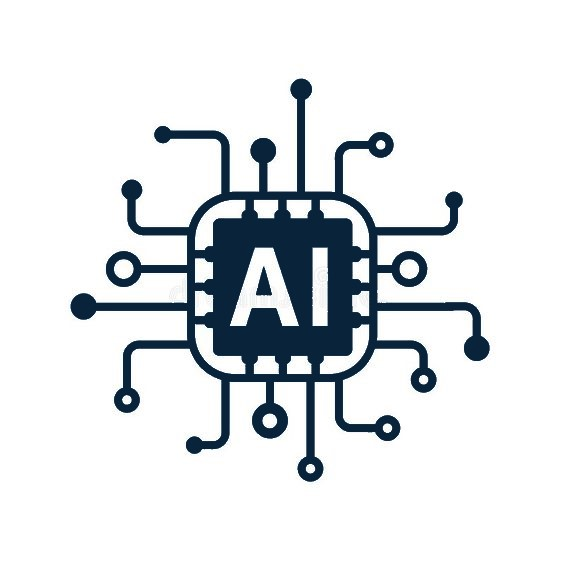

</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> PRE-PROCESSING
</h1></left> 
<a href=#cont>Back to Table of Contents</a>

In [132]:
'''
This function applies pre-processing feature engineering to the EntryExit [2017-2021] datasets

in preparation for building the multi-target regression model.

'''
def pre_process(name):
    # Filter the table for London Underground travel mode records only
    name[name['Mode'] == 'LU']
    # Remove any null entries within the table
    name.dropna()
    # Reset the index after removing null entries from the table 
    name.reset_index()
    # Carry out One Hot Dummy encoding on categorical features
    name = pd.get_dummies(name, columns = ['ASC','Coverage',' day',' dir'],
                  prefix = {
                      'ASC':'ASC',
                      'Coverage':'Coverage',
                      ' day':'day',
                      ' dir':'dir'
                  })
    # Carry out label encoding for the Stations feature
    name['Station_encoded'] = le.fit_transform(name['Station'].values)
    return name 

In [133]:
# Apply the pre_processing function to the EntryExit files
EntryExit_2021 = pre_process(EntryExit_2021)
EntryExit_2020 = pre_process(EntryExit_2020)
EntryExit_2019 = pre_process(EntryExit_2019)
EntryExit_2018 = pre_process(EntryExit_2018)
EntryExit_2017 = pre_process(EntryExit_2017)

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> TRAIN - TEST SPLIT
</h1></left>
<a href=#cont>Back to Table of Contents</a>

In [134]:
# This function performs the train-test split for the pre-processed Annualized Entry Exit [2017-20121] datasets
def Xy_split(df):
    x_df = df.drop(columns = list(df)[11:107])
    x_df = x_df.drop(columns = ['Station', 'Mode'])
    y_df = df[list(df)[11:107]]
    return x_df, y_df

In [135]:
# Applying the Xy_split function to the dataset prior to the train-test split
X,y = Xy_split(EntryExit_2021)

In [136]:
# Carrying out the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;">MULTI-TARGET REGRESSION 
</h1></left>
<a href=#cont>Back to Table of Contents</a>

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> I LINEAR REGRESSOR
</h1></left>
<a href=#cont>Back to Table of Contents</a>

In [137]:
# Initializing the timer so as to measure execution time as a performance metric
start_lr = time.time()
# define the model
lr = LinearRegression()
# fit the model to the train sets
lr.fit(X_train, y_train)
# make a prediction
lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)
# Stop the timer so as to measure the execution time taken to perform the modeling
end_lr = time.time()

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> II K-NEAREST NEIGHBOURS REGRESSOR 
</h1></left>
<a href=#cont>Back to Table of Contents</a>

In [138]:
# Initializing the timer so as to measure execution time as a performance metric
start_knn = time.time()
# define the model
knn = KNeighborsRegressor()
# fit the model to the train sets
knn.fit(X_train, y_train)
# make a prediction
knn_pred_train = knn.predict(X_train)
knn_pred_test = knn.predict(X_test)
# Stop the timer so as to measure the execution time taken to perform the modeling
end_knn = time.time()

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;">III DECISION TREE REGRESSOR
</h1></left>
<a href=#cont>Back to Table of Contents</a>

In [139]:
# Initializing the timer so as to measure execution time as a performance metric
start_dtr = time.time()
# define the model
dtr = DecisionTreeRegressor()
# fit the model to the train sets
dtr.fit(X_train, y_train)
# make a prediction
dtr_pred_train = dtr.predict(X_train)
dtr_pred_test = dtr.predict(X_test)
# Stop the timer so as to measure the execution time taken to perform the modeling
end_dtr = time.time()

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;">IV RANDOM FOREST REGRESSOR
</h1></left>
<a href=#cont>Back to Table of Contents</a>

In [141]:
# Initializing the timer so as to measure execution time as a performance metric
start_rfr = time.time()
# define the model
rfr = RandomForestRegressor()
# fit the model to the train sets
rfr.fit(X_train, y_train)
# make a prediction
rfr_pred_train = rfr.predict(X_train)
rfr_pred_test = rfr.predict(X_test
# Stop the timer so as to measure the execution time taken to perform the modeling
end_rfr = time.time()

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;">V ELASTIC NET REGRESSOR
</h1></left>
<a href=#cont>Back to Table of Contents</a>

In [142]:
# Initializing the timer so as to measure execution time as a performance metric
start_enr = time.time()
# define the model
enr = ElasticNet(alpha=1.0, l1_ratio=0.5)
# fit the model to the train sets
enr.fit(X_train, y_train)
# make a prediction
enr_pred_train = enr.predict(X_train)
enr_pred_test = enr.predict(X_test)
# Stop the timer so as to measure the execution time taken to perform the modeling
end_enr = time.time()

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;">VI BAYESIAN REGRESSOR  
</h1></left>
<a href=#cont>Back to Table of Contents</a>

In [144]:
# Initializing the timer so as to measure execution time as a performance metric
start_br = time.time()
# define the model
br = BayesianRidge()
# fit the model to the train sets
w_br = MultiOutputRegressor(br)
w_br.fit(X_train, y_train)
# make a prediction
br_pred_train = w_br.predict(X_train)
br_pred_test = w_br.predict(X_test)
# Stop the timer so as to measure the execution time taken to perform the modeling
end_br = time.time()

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;">VII POLYNOMIAL REGRESSOR
</h1></left>
<a href=#cont>Back to Table of Contents</a>

In [ ]:
# NB Has a tendancy to crash the system when trained on 80% of the dataset due to a Memory Error.
# Due to poor performance in the train and test responces its metrics were not included in the performance analysis
# Initializing the timer so as to measure execution time as a performance metric
start_pr = time.time()
# define the model
poly_reg = PolynomialFeatures(degree = 2)
model = LinearRegression()
# fit the model to the train sets
x_poly_train = poly_reg.fit_transform(X_train[:1595])
x_poly_test  = poly_reg.fit_transform(X_test)
# make a prediction
model.fit(x_poly_train, y_train[:1595])
pr_pred_train = model.predict(x_poly_train)
pr_pred_test = model.predict(x_poly_test)
# Stop the timer so as to measure the execution time taken to perform the modeling
end_pr = time.time()

</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> TIME SERIES MODEL 
</h1></left>
<a href=#cont>Back to Table of Contents</a>

<a id="nine"></a>
</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> MODEL PERFORMANCE METRICS ANALYSIS
</h1></left>
<a href=#cont>Back to Table of Contents</a>

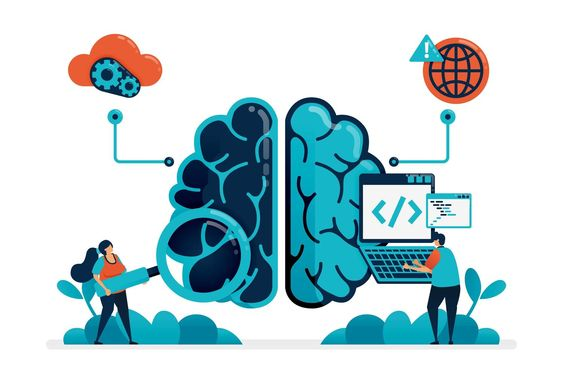

In [145]:
# Creates a dictionar of the model performace metrics for later use in performance metric analysis
results_dict = {'Train RMSE': # Calculates the train RMSE
                    {
                        "Linear Regressor": np.sqrt(mean_squared_error(y_train, lr_pred_train)),
                        "K-Nearest Neighbour regressor": np.sqrt(mean_squared_error(y_train, knn_pred_train)),
                        "Decision Tree Regressor": np.sqrt(mean_squared_error(y_train, dtr_pred_train)),
                        "Random Forest Regressor": np.sqrt(mean_squared_error(y_train, rfr_pred_train)),
                        "Elastic Net Regressor": np.sqrt(mean_squared_error(y_train, enr_pred_train)),
                        "Bayesian Regressor": np.sqrt(mean_squared_error(y_train, br_pred_train)),
                        
                        
                    },
                'Test RMSE': # Calculates the test RMSE
                    {
                        "Linear Regressor": np.sqrt(mean_squared_error(y_test, lr_pred_test)),
                        "K-Nearest Neighbour regressor": np.sqrt(mean_squared_error(y_test, knn_pred_test)),
                        "Decision Tree Regressor": np.sqrt(mean_squared_error(y_test, dtr_pred_test)),
                        "Random Forest Regressor": np.sqrt(mean_squared_error(y_test, rfr_pred_test)),
                        "Elastic Net Regressor": np.sqrt(mean_squared_error(y_test, enr_pred_test)),
                        "Bayesian Regressor": np.sqrt(mean_squared_error(y_test, br_pred_test)),
                        
                        
                        
                    },
             'Train R-squared': # Calculates the train R squared value
                    {
                        "Linear Regressor": r2_score(y_train, lr_pred_train),
                        "K-Nearest Neighbour regressor": r2_score(y_train, knn_pred_train),
                        "Decision Tree Regressor": r2_score(y_train, dtr_pred_train),
                        "Random Forest Regressor": r2_score(y_train, rfr_pred_train),
                        "Elastic Net Regressor": r2_score(y_train, enr_pred_train),
                        "Bayesian Regressor": r2_score(y_train, br_pred_train),
                

                    },
            'Test R-squared':  # Calculates the test R squared value
                    {
                        "Linear Regressor": r2_score(y_test, lr_pred_test),
                        "K-Nearest Neighbour regressor": r2_score(y_test, knn_pred_test),
                        "Decision Tree Regressor": r2_score(y_test, dtr_pred_test),
                        "Random Forest Regressor": r2_score(y_test, rfr_pred_test),
                        "Elastic Net Regressor": r2_score(y_test, enr_pred_test),
                        "Bayesian Regressor": r2_score(y_test, br_pred_test),
                    },
            'Execution Time [sec]': # Measures the execution time of the model
                    {
                        "Linear Regressor": round((end_lr - start_lr), 2),
                        "K-Nearest Neighbour regressor": round((end_knn - start_knn), 2),
                        "Decision Tree Regressor": round((end_dtr - start_dtr), 2),
                        "Random Forest Regressor": round((end_rfr - start_rfr), 2),
                        "Elastic Net Regressor": round((end_enr - start_enr), 2),
                        "Bayesian Regressor": round((end_br - start_br), 2)
                    }
                }
results = pd.DataFrame(data = results_dict)

In [146]:
# Display the performance metrics in a table format 
results

,Train RMSE,Test RMSE,Train R-squared,Test R-squared,Execution Time [sec]
Linear Regressor,19.295370,21.961966,0.902463,0.834338,0.96
K-Nearest Neighbour regressor,26.788726,32.855568,0.900496,0.835649,0.83
Decision Tree Regressor,0.000000,40.210028,1.000000,0.696389,0.67
Random Forest Regressor,11.584600,29.166626,0.981653,0.875221,23.14
Elastic Net Regressor,20.979103,20.489678,0.901319,0.893482,235.77
Bayesian Regressor,20.636162,20.227239,0.921126,0.910234,60.12


In [183]:
# Plots the performance metrics of the various models using the dictionary created for analysis and evaluation 
fig = px.bar(results, x = results.index, y = ['Train RMSE', 'Test RMSE'],
            barmode = 'group', title = 'TRAIN-TEST RMSE PERFORMANCE METRICS GRAPH')
fig.show()

In [184]:
# Plots the performance metrics of the various models using the dictionary created for analysis and evaluation 
fig = px.bar(results, x = results.index, y = ['Train R-squared', 'Test R-squared'],
            barmode = 'group', title = 'TRAIN-TEST R SQUARED PERFORMANCE METRICS GRAPH ')
fig.show()

In [185]:
# Plots the performance metrics of the various models using the dictionary created for analysis and evaluation 
fig = px.pie(results, values = 'Execution Time [sec]', names = results.index, title = 'EXECUTION TIME PERFORMANCE METRIC GRAPH')
fig.show()

</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> MODEL OPTIMIZATION
</h1></left>
<a href=#cont>Back to Table of Contents</a>

</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> THE FINAL MODEL 
</h1></left>
<a href=#cont>Back to Table of Contents</a>

</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> MODEL PICKLING  
</h1></left>
<a href=#cont>Back to Table of Contents</a>

In [ ]:
# creates a list of model names and stores them as a list
model_list = ['lr','knn','dtr','rfr','enr','w_br']

In [ ]:
# Pickles the models within the model_list to a file locationo named Pickled Models
for model in model_list: 
    with open('Pickled Models/' + str(model), 'wb') as f:
        pickle.dump(model, f)

<a id="eleven"></a>
</h1></left><left><h1 style="font-size:125%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> LOGGING COMMET EXPERIMENT
</h1></left>

<a href=#cont>Back to Table of Contents</a>

In [ ]:
'''
# Create dictionaries for the data we want to log          
metrics = {
    "Index":['SVD','Normal Predictor','Baseline Only','NMF','Slope One'],
    "Fit Time": [fit_time_svd, fit_time_np, fit_time_blo, fit_time_nmf, fit_time_slo],
    "Test Time": [test_time_svd, test_time_np, test_time_blo, test_time_nmf, test_time_slo],
    "Test RMSE": [svd_rmse, np_rmse, blo_rmse, nmf_rmse, slo_rmse]
}

params= {'model': 'Base Line Only',
         'method': 2,
         'n_epochs': 50,
         }

# Log info on comet
experiment.log_metrics(metrics)
experiment.log_parameters(params)

# End experiment
experiment.end()

# Display results on comet page
experiment.display()

'''

<a id="eight"></a>
</h1></left><left><h1 style="font-size:250%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> REFFERENCES
</h1></left>
<a href=#cont>Back to Table of Contents</a>

This section contains a list of all the websites and resources used during the development of this prohject notebook.